<a href="https://colab.research.google.com/github/marcosoares-92/IndustrialDataScienceWorkflow/blob/main/model_project/steel_industry_energy_consumption/cycle2_etl_3_Dataset_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Transformation**

## _ETL Workflow Notebook 3_

## Content:
1. Removing trailing or leading white spaces or characters (trim) from string variables, and modifying the variable type;
2. Capitalizing or lowering case of string variables (string homogenizing);
3. Adding contractions to the contractions library;
4. Correcting contracted strings;
5. Substituting (replacing) substrings on string variables;
6. Inverting the order of the string characters;
7. Slicing the strings;
8. Getting the leftest characters from the strings (retrieve last characters);
9. Getting the rightest characters from the strings (retrieve first characters);
10. Joining strings from a same column into a single string;
11. Joining several string columns into a single string column;
12. Splitting strings into a list of strings;
13. Substituting (replacing or switching) whole strings by different text values (on string variables);
14. Replacing strings with Machine Learning: finding similar strings and replacing them by standard strings;
15. Searching for Regular Expression (RegEx) within a string column;
16. Replacing a Regular Expression (RegEx) from a string column;
17. Transforming the dataset and reverse transforms: log-transform; 
18. Exponential transform; 
19. Box-Cox transform; 
20. One-Hot Encoding;
21. Ordinal Encoding;
22. Feature scaling; 
23. Importing or exporting models and dictionaries.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

In [ ]:
# To install a library (e.g. tensorflow), unmark and run:
# ! pip install tensorflow
# to update a library (e.g. tensorflow), unmark and run:
# ! pip install tensorflow --upgrade
# to update pip, unmark and run:
# ! pip install pip --upgrade
# to show if a library is installed and visualize its information, unmark and run
# (e.g. tensorflow):
# ! pip show tensorflow
# To run a Python file (e.g idsw_etl.py) saved in the notebook's workspace directory,
# unmark and run:
# import idsw_etl
# or:
# import idsw_etl as etl

## **Load Python Libraries in Global Context**

In [ ]:
# Run installed library
import pandas as pd
import numpy as np
import idsw
from idsw import etl
from idsw.etl import etl_workflow as ewf

In [ ]:
# Run Python files
import numpy as np
import pandas as pd
import idsw
from etl import etl_workflow as ewf

## **Call the functions**

### **Mounting Google Drive or S3 (AWS Simple Storage Service) bucket**

In [ ]:
SOURCE = 'google'
# SOURCE = 'google' for mounting the google drive;
# SOURCE = 'aws' for accessing an AWS S3 bucket

## THE FOLLOWING PARAMETERS HAVE EFFECT ONLY WHEN SOURCE == 'aws':

PATH_TO_STORE_IMPORTED_S3_BUCKET = ''
# PATH_TO_STORE_IMPORTED_S3_BUCKET: path of the Python environment to which the
# S3 bucket contents will be imported. If it is None; or if it is an empty string; or if 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = '/', bucket will be imported to the root path. 
# Alternatively, input the path as a string (in quotes). e.g. 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = 'copied_s3_bucket'

S3_BUCKET_NAME = 'my_bucket'
## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
# with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
# "aws-bucket-1"

S3_OBJECT_FOLDER_PREFIX = ""
# S3_OBJECT_FOLDER_PREFIX = None. Keep it None; or as an empty string 
# (S3_OBJECT_FOLDER_PREFIX = ''); or as the root "/" to import the 
# whole bucket content, instead of a single object from it.
# Alternatively, set it as a string containing the subfolder from the bucket to import:
# Suppose that your bucket (admin-created) has four objects with the following object 
# keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
# s3-dg.pdf. 
# The s3-dg.pdf key does not have a prefix, so its object appears directly 
# at the root level of the bucket. If you open the Development/ folder, you see 
# the Projects.xlsx object in it.
# In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
# where 'bucket' is the bucket's name, prefix = 'my_path/.../', without the
# 'file.csv' (file name with extension) last part.

# So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
# a given folder (directory) of the bucket.
# DO NOT PUT A SLASH before (to the right of) the prefix;
# DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

# Alternatively, provide the full path of a given file if you want to import only it:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
# where my_file is the file's name, and ext is its extension.


# Attention: after running this function for fetching AWS Simple Storage System (S3), 
# your 'AWS Access key ID' and your 'Secret access key' will be requested.
# The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
# other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
# and the prefix. All of these are sensitive information from the organization.
# Therefore, after importing the information, always remember of cleaning the output of this cell
# and of removing such information from the strings.
# Remember that these data may contain privilege for accessing protected information, 
# so it should not be used for non-authorized people.

# Also, remember of deleting the imported files from the workspace after finishing the analysis.
# The costs for storing the files in S3 is quite inferior than those for storing directly in the
# workspace. Also, files stored in S3 may be accessed for other users than those with access to
# the notebook's workspace.
idsw.mount_storage_system (source = SOURCE, path_to_store_imported_s3_bucket = PATH_TO_STORE_IMPORTED_S3_BUCKET, s3_bucket_name = S3_BUCKET_NAME, s3_obj_prefix = S3_OBJECT_FOLDER_PREFIX)

### **Importing the dataset**

In [ ]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
## JSON, txt, or CSV (comma separated values) files.

FILE_DIRECTORY_PATH = "/content/drive/MyDrive/model_project/steel_industry_energy_consumption"
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset_cleaned_30h_avg.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True 
# if you want to read a file with txt extension containing a text formatted as JSON 
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the 
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}

    
HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.
    
SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = idsw.load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Tokenization took: 0.24 ms
Type conversion took: 0.59 ms
Parser memory cleanup took: 0.01 ms
Dataset extracted from /content/drive/MyDrive/model_project/steel_industry_energy_consumption/dataset_cleaned_30h_avg.csv. Check the 10 first rows of this dataframe:



,timestamp,month,week,day,day_of_week,load_type,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,leading_current_power_factor,nsm,usage_kwh
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750
1,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167
2,2018-01-03 12:00:00,1,1,3,Sunday,Light_Load,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167
3,2018-01-04 18:00:00,1,1,4,Tuesday,Light_Load,1.781250,9.737167,0.000000,82.118333,53.164750,49230.0,3.109167
4,2018-01-06 00:00:00,1,1,6,Friday,Light_Load,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167
5,2018-01-07 06:00:00,1,1,7,Sunday,Light_Load,1.941167,8.969417,0.000000,79.630083,56.142750,40590.0,2.919500
6,2018-01-08 12:00:00,1,2,8,Saturday,Light_Load,4.221583,6.002417,0.004000,81.949833,71.512000,44910.0,11.701583
7,2018-01-09 18:00:00,1,2,9,Monday,Medium_Load,11.358417,2.933583,0.007833,74.765583,85.589917,49230.0,19.334250
8,2018-01-11 00:00:00,1,2,11,Thursday,Light_Load,13.786833,2.857833,0.010083,78.643500,88.090083,36270.0,24.649333
9,2018-01-12 06:00:00,1,2,12,Saturday,Light_Load,5.814083,6.602500,0.006333,89.418750,76.928667,40590.0,17.879250


### **Removing trailing or leading white spaces or characters (trim) from string variables, and modifying the variable type**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'day_of_week'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

NEW_VARIABLE_TYPE = None
# NEW_VARIABLE_TYPE = None. String (in quotes) that represents a given data type for the column
# after transformation. Set:
# - NEW_VARIABLE_TYPE = 'int' to convert the column to integer type after the transform;
# - NEW_VARIABLE_TYPE = 'float' to convert the column to float (decimal number);
# - NEW_VARIABLE_TYPE = 'datetime' to convert it to date or timestamp;
# - NEW_VARIABLE_TYPE = 'category' to convert it to Pandas categorical variable.
    
METHOD = 'trim'
# METHOD = 'trim' will eliminate trailing and leading white spaces from the strings in
# COLUMN_TO_ANALYZE.
# METHOD = 'substring' will eliminate a defined trailing and leading substring from
# COLUMN_TO_ANALYZE.

SUBSTRING_TO_ELIMINATE = None
# SUBSTRING_TO_ELIMINATE = None. Set as a string (in quotes) if METHOD = 'substring'.
# e.g. suppose COLUMN_TO_ANALYZE contains time information: each string ends in " min":
# "1 min", "2 min", "3 min", etc. If SUBSTRING_TO_ELIMINATE = " min", this portion will be
# eliminated, resulting in: "1", "2", "3", etc. If NEW_VARIABLE_TYPE = None, these values will
# continue to be strings. By setting NEW_VARIABLE_TYPE = 'int' or 'float', the series will be
# converted to a numeric type.

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_trim'
# NEW_COLUMN_SUFFIX = "_trim"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_trim", the new column will be named as
# "column1_trim".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.
    

# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.trim_spaces_or_characters (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, new_variable_type = NEW_VARIABLE_TYPE, method = METHOD, substring_to_eliminate = SUBSTRING_TO_ELIMINATE, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

Finished removing leading and trailing spaces or characters (substrings).
Check the 10 first elements from the series:



0      Monday
1    Thursday
2      Sunday
3     Tuesday
4      Friday
5      Sunday
6    Saturday
7      Monday
8    Thursday
9    Saturday
Name: day_of_week, dtype: object

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

NEW_VARIABLE_TYPE = None
# NEW_VARIABLE_TYPE = None. String (in quotes) that represents a given data type for the column
# after transformation. Set:
# - NEW_VARIABLE_TYPE = 'int' to convert the column to integer type after the transform;
# - NEW_VARIABLE_TYPE = 'float' to convert the column to float (decimal number);
# - NEW_VARIABLE_TYPE = 'datetime' to convert it to date or timestamp;
# - NEW_VARIABLE_TYPE = 'category' to convert it to Pandas categorical variable.
    
METHOD = 'trim'
# METHOD = 'trim' will eliminate trailing and leading white spaces from the strings in
# COLUMN_TO_ANALYZE.
# METHOD = 'substring' will eliminate a defined trailing and leading substring from
# COLUMN_TO_ANALYZE.

SUBSTRING_TO_ELIMINATE = None
# SUBSTRING_TO_ELIMINATE = None. Set as a string (in quotes) if METHOD = 'substring'.
# e.g. suppose COLUMN_TO_ANALYZE contains time information: each string ends in " min":
# "1 min", "2 min", "3 min", etc. If SUBSTRING_TO_ELIMINATE = " min", this portion will be
# eliminated, resulting in: "1", "2", "3", etc. If NEW_VARIABLE_TYPE = None, these values will
# continue to be strings. By setting NEW_VARIABLE_TYPE = 'int' or 'float', the series will be
# converted to a numeric type.

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_trim'
# NEW_COLUMN_SUFFIX = "_trim"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_trim", the new column will be named as
# "column1_trim".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.
    

# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.trim_spaces_or_characters (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, new_variable_type = NEW_VARIABLE_TYPE, method = METHOD, substring_to_eliminate = SUBSTRING_TO_ELIMINATE, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

Finished removing leading and trailing spaces or characters (substrings).
Check the 10 first elements from the series:



0     Light_Load
1     Light_Load
2     Light_Load
3     Light_Load
4     Light_Load
5     Light_Load
6     Light_Load
7    Medium_Load
8     Light_Load
9     Light_Load
Name: load_type, dtype: object

### **Capitalizing or lowering case of string variables (string homogenizing)**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'day_of_week'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

METHOD = 'lowercase'
# METHOD = 'capitalize' will capitalize all letters from the input string 
# (turn them to upper case).
# METHOD = 'lowercase' will make the opposite: turn all letters to lower case.
# e.g. suppose COLUMN_TO_ANALYZE contains strings such as 'String One', 'STRING 2',  and
# 'string3'. If METHOD = 'capitalize', the output will contain the strings: 
# 'STRING ONE', 'STRING 2', 'STRING3'. If METHOD = 'lowercase', the outputs will be:
# 'string one', 'string 2', 'string3'.

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_homogenized'
# NEW_COLUMN_SUFFIX = "_homogenized"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_homogenized", the new column will be named as
# "column1_homogenized".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.
    
    
# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.capitalize_or_lower_string_case (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, method = METHOD, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

Lowering the string case (moving all characters to lower case).

Finished homogenizing the string case of day_of_week, giving value consistency.
Check the 10 first elements from the series:



0      monday
1    thursday
2      sunday
3     tuesday
4      friday
5      sunday
6    saturday
7      monday
8    thursday
9    saturday
Name: day_of_week, dtype: object

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

METHOD = 'lowercase'
# METHOD = 'capitalize' will capitalize all letters from the input string 
# (turn them to upper case).
# METHOD = 'lowercase' will make the opposite: turn all letters to lower case.
# e.g. suppose COLUMN_TO_ANALYZE contains strings such as 'String One', 'STRING 2',  and
# 'string3'. If METHOD = 'capitalize', the output will contain the strings: 
# 'STRING ONE', 'STRING 2', 'STRING3'. If METHOD = 'lowercase', the outputs will be:
# 'string one', 'string 2', 'string3'.

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_homogenized'
# NEW_COLUMN_SUFFIX = "_homogenized"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_homogenized", the new column will be named as
# "column1_homogenized".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.
    
    
# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.capitalize_or_lower_string_case (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, method = METHOD, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

Lowering the string case (moving all characters to lower case).

Finished homogenizing the string case of load_type, giving value consistency.
Check the 10 first elements from the series:



0     light_load
1     light_load
2     light_load
3     light_load
4     light_load
5     light_load
6     light_load
7    medium_load
8     light_load
9     light_load
Name: load_type, dtype: object

### **Substituting (replacing) substrings on string variables**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

SUBSTRING_TO_BE_REPLACED = "_load"
NEW_SUBSTRING_FOR_REPLACEMENT = ''
# SUBSTRING_TO_BE_REPLACED = None; new_substring_for_replacement = ''. 
# Strings (in quotes): when the sequence of characters SUBSTRING_TO_BE_REPLACED was
# found in the strings from column_to_analyze, it will be substituted by the substring
# NEW_SUBSTRING_FOR_REPLACEMENT. If None is provided to one of these substring arguments,
# it will be substituted by the empty string: ''
# e.g. suppose COLUMN_TO_ANALYZE contains the following strings, with a spelling error:
# "my collumn 1", 'his collumn 2', 'her column 3'. We may correct this error by setting:
# SUBSTRING_TO_BE_REPLACED = 'collumn' and NEW_SUBSTRING_FOR_REPLACEMENT = 'column'. The
# function will search for the wrong group of characters and, if it finds it, will substitute
# by the correct sequence: "my column 1", 'his column 2', 'her column 3'.

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_substringReplaced'
# NEW_COLUMN_SUFFIX = "_substringReplaced"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_substringReplaced", the new column will be named as
# "column1_substringReplaced".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.


# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.replace_substring (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, substring_to_be_replaced = SUBSTRING_TO_BE_REPLACED, new_substring_for_replacement = NEW_SUBSTRING_FOR_REPLACEMENT, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

ATTENTION: Operations of string strip (removal) or replacement are all case-sensitive. There must be correct correspondence between cases and spaces for the strings being removed or replaced.

Finished replacing the substring _load by .
Check the 10 first elements from the series:



0     light
1     light
2     light
3     light
4     light
5     light
6     light
7    medium
8     light
9     light
Name: load_type, dtype: object

### **Substituting (replacing or switching) whole strings by different text values (on string variables)**

# Since the days of week do not appear in order in the dataset, applying the ordinal encoding would create an erroneous order.
- Let's replace the days by the correspondent number, and then modify the variable type.

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'day_of_week'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

LIST_OF_DICTIONARIES_WITH_ORIGINAL_STRINGS_AND_REPLACEMENTS = [
    
    {'original_string': 'monday', 'new_string': 1}, 
    {'original_string': 'tuesday', 'new_string': 2}, 
    {'original_string': 'wednesday', 'new_string': 3}, 
    {'original_string': 'thursday', 'new_string': 4}, 
    {'original_string': 'friday', 'new_string': 5}, 
    {'original_string': 'saturday', 'new_string': 6}, 
    {'original_string': 'sunday', 'new_string': 7}, 
    {'original_string': None, 'new_string': None}, 
    {'original_string': None, 'new_string': None}, 
    {'original_string': None, 'new_string': None}, 
    {'original_string': None, 'new_string': None}
    
]
# LIST_OF_DICTIONARIES_WITH_ORIGINAL_STRINGS_AND_REPLACEMENTS = 
# [{'original_string': None, 'new_string': None}]
# This is a list of dictionaries, where each dictionary contains two key-value pairs:
# the first one contains the original string; and the second one contains the new string
# that will substitute the original one. The function will loop through all dictionaries in
# this list, access the values of the keys 'original_string', and search these values on the strings
# in COLUMN_TO_ANALYZE. When the value is found, it will be replaced (switched) by the correspondent
# value in key 'new_string'.
    
# The object LIST_OF_DICTIONARIES_WITH_ORIGINAL_STRINGS_AND_REPLACEMENTS must be declared as a list, 
# in brackets, even if there is a single dictionary.
# Use always the same keys: 'original_string' for the original strings to search on the column 
# column_to_analyze; and 'new_string', for the strings that will replace the original ones.
# Notice that this function will not search for substrings: it will substitute a value only when
# there is perfect correspondence between the string in 'column_to_analyze' and 'original_string'.
# So, the cases (upper or lower) must be the same.
    
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to replace more
# values.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'original_string': original_str, 'new_string': new_str}, 
# where original_str and new_str represent the strings for searching and replacement 
# (If one of the keys contains None, the new dictionary will be ignored).
    
# Example:
# Suppose the COLUMN_TO_ANALYZE contains the values 'sunday', 'monday', 'tuesday', 'wednesday',
# 'thursday', 'friday', 'saturday', but you want to obtain data labelled as 'weekend' or 'weekday'.
# Set: LIST_OF_DICTIONARIES_WITH_ORIGINAL_STRINGS_AND_REPLACEMENTS = 
# [{'original_string': 'sunday', 'new_string': 'weekend'},
# {'original_string': 'saturday', 'new_string': 'weekend'},
# {'original_string': 'monday', 'new_string': 'weekday'},
# {'original_string': 'tuesday', 'new_string': 'weekday'},
# {'original_string': 'wednesday', 'new_string': 'weekday'},
# {'original_string': 'thursday', 'new_string': 'weekday'},
# {'original_string': 'friday', 'new_string': 'weekday'}]

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_stringReplaced'
# NEW_COLUMN_SUFFIX = "_stringReplaced"
# This value has effect only if CREATE_NEW_COLUMN = True.
# column was "column1" and the suffix is "_stringReplaced", the new column will be named as
# "column1_stringReplaced".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.


# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.switch_strings (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, list_of_dictionaries_with_original_strings_and_replacements = LIST_OF_DICTIONARIES_WITH_ORIGINAL_STRINGS_AND_REPLACEMENTS, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

ATTENTION: Operations of string strip (removal) or replacement are all case-sensitive. There must be correct correspondence between cases and spaces for the strings being removed or replaced.

Finished replacing the substrings accordingly to the mapping: {'monday': '1', 'tuesday': '2', 'wednesday': '3', 'thursday': '4', 'friday': '5', 'saturday': '6', 'sunday': '7'}.
Check the 10 first elements from the series:



0    1
1    4
2    7
3    2
4    5
5    7
6    6
7    1
8    4
9    6
Name: day_of_week, dtype: object

In [ ]:
# convert to integer 64 bits
dataset['day_of_week'] = dataset['day_of_week'].astype(np.int64)

# Before deciding the normalization strategy, let's check if the numeric variables have zero or negative values.

In [ ]:
dataset.columns

Index(['timestamp', 'month', 'week', 'day', 'day_of_week', 'load_type',
       'lagging_current_reactive_power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2_tco2',
       'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
       'usage_kwh'],
      dtype='object')

In [ ]:
print('lagging_current_reactive_power_kvarh', dataset['lagging_current_reactive_power_kvarh'].min())
print('leading_current_reactive_power_kvarh', dataset['leading_current_reactive_power_kvarh'].min())
print('co2_tco2', dataset['co2_tco2'].min())
print('lagging_current_power_factor', dataset['lagging_current_power_factor'].min())
print('leading_current_power_factor', dataset['leading_current_power_factor'].min())
print('nsm', dataset['nsm'].min())
print('usage_kwh', dataset['usage_kwh'].min())

lagging_current_reactive_power_kvarh 0.9794166666666668
leading_current_reactive_power_kvarh 0.0264166666666666
co2_tco2 0.0
lagging_current_power_factor 66.16658333333334
leading_current_power_factor 49.37316666666666
nsm 36270.0
usage_kwh 2.725583333333333


# Since there are no negative values, we can try to normalize and scale the dataset through the logarithmic transformation.
- There are some zero values, so the dataset will be shrinkled. We must check if this will result in substantial loss of information.

In [ ]:
print("original number of rows = {}".format(len(dataset)))

original number of rows = 292


### **log-transforming the variables**

In [ ]:
#### WARNING: This function will eliminate rows where the selected variables present 
#### values lower or equal to zero (condition for the logarithm to be applied).

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

SUBSET = ['lagging_current_reactive_power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2_tco2',
       'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
       'usage_kwh']
# Set SUBSET = None to transform the whole dataset. Alternatively, pass a list with 
# columns names for the transformation to be applied. For instance:
# SUBSET = ['col1', 'col2', 'col3'] will apply the transformation to the columns named
# as 'col1', 'col2', and 'col3'. Declare the names inside quotes.
# Declaring the full list of columns is equivalent to setting SUBSET = None.

CREATE_NEW_COLUMNS = True
# Alternatively, set CREATE_NEW_COLUMNS = True to store the transformed data into new
# columns. Or set CREATE_NEW_COLUMNS = False to overwrite the existing columns
    
NEW_COLUMNS_SUFFIX = "_log"
# This value has effect only if CREATE_NEW_COLUMNS = True.
# The new column name will be set as column + NEW_COLUMNS_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_log", the new column will be named as
# "column1_log".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.

# New dataframe saved as log_transf_df.
# Simply modify this object on the left of equality:
dataset = ewf.log_transform (df = DATASET, subset = SUBSET, create_new_columns = CREATE_NEW_COLUMNS, new_columns_suffix = NEW_COLUMNS_SUFFIX)

# One curve derived from the normal is the log-normal.
# If the values Y follow a log-normal distribution, their log follow a normal.
# A log normal curve resembles a normal, but with skewness (distortion); 
# and kurtosis (long-tail).

# Applying the log is a methodology for normalizing the variables: 
# the sample space gets shrinkled after the transformation, making the data more 
# adequate for being processed by Machine Learning algorithms. Preferentially apply 
# the transformation to the whole dataset, so that all variables will be of same order 
# of magnitude.
# Obviously, it is not necessary for variables ranging from -100 to 100 in numerical 
# value, where most outputs from the log transformation are.

The columns were successfully log-transformed. Check the 10 first rows of the new dataset:



,timestamp,month,week,day,day_of_week,load_type,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,leading_current_power_factor,nsm,usage_kwh,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log
0,2018-01-01 00:00:00,1,1,1,1,light,4.505333,7.908000,0.002083,83.672417,65.660917,36270.0,8.136750,1.505262,2.067875,-6.173786,4.426909,4.184504,10.498746,2.096391
1,2018-01-02 06:00:00,1,1,2,4,light,23.676167,1.035583,0.023333,82.407083,98.293750,40590.0,52.971167,3.164469,0.034965,-3.757872,4.411671,4.587960,10.611277,3.969748
2,2018-01-03 12:00:00,1,1,3,7,light,2.023417,9.915833,0.002917,86.371333,62.568333,44910.0,8.528167,0.704788,2.294133,-5.837314,4.458656,4.136259,10.712416,2.143374
4,2018-01-06 00:00:00,1,1,6,5,light,10.054917,3.763667,0.007167,72.467583,87.047000,36270.0,17.667167,2.308062,1.325394,-4.938315,4.283139,4.466448,10.498746,2.871708
6,2018-01-08 12:00:00,1,2,8,6,light,4.221583,6.002417,0.004000,81.949833,71.512000,44910.0,11.701583,1.440210,1.792162,-5.521461,4.406107,4.269865,10.712416,2.459724
7,2018-01-09 18:00:00,1,2,9,1,medium,11.358417,2.933583,0.007833,74.765583,85.589917,49230.0,19.334250,2.429959,1.076225,-4.849367,4.314358,4.449567,10.804258,2.961878
8,2018-01-11 00:00:00,1,2,11,4,light,13.786833,2.857833,0.010083,78.643500,88.090083,36270.0,24.649333,2.623714,1.050064,-4.596871,4.364925,4.478360,10.498746,3.204750
9,2018-01-12 06:00:00,1,2,12,6,light,5.814083,6.602500,0.006333,89.418750,76.928667,40590.0,17.879250,1.760283,1.887448,-5.061929,4.493330,4.342879,10.611277,2.883641
10,2018-01-13 12:00:00,1,2,13,7,medium,6.221417,8.971500,0.008083,89.240583,74.565417,44910.0,20.903000,1.827998,2.194053,-4.817951,4.491336,4.311677,10.712416,3.039893
11,2018-01-14 18:00:00,1,2,14,1,light,17.294083,5.535917,0.014500,85.673750,83.252750,49230.0,34.040000,2.850364,1.711257,-4.233607,4.450546,4.421881,10.804258,3.527536


In [ ]:
print("new number of rows = {}".format(len(log_transf_df)))
print(f"Reduce on number of rows = {(len(dataset)-len(log_transf_df))/(len(dataset))*100:.2f} %")

new number of rows = 271
Reduce on number of rows = 7.19 %


# Now, the reduction on the number of entries is very low. So, we keep the log transform, which is better than min-max scaling for normalization.

### **One-Hot Encoding the categorical variables**
- For each category, the One-Hot Encoder creates a new column in the dataset. This new column is represented by a binary variable which is equals to zero if the row is not classified in that category; and is equals to 1 when the row represents an element in that category.For a category "A", a column named "A" is created.
    - If the row is an element from category "A", the value for the column "A" is 1.
    - If not, the value for column "A" is 0.

# Let's One-Hot Encode the load type, which do not have an order relation

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be processed

SUBSET_OF_FEATURES_TO_BE_ENCODED = ['load_type']
# SUBSET_OF_FEATURES_TO_BE_ENCODED: list of strings (inside quotes), 
# containing the names of the columns with the categorical variables that will be 
# encoded. If a single column will be encoded, declare this parameter as list with
# only one element e.g.SUBSET_OF_FEATURES_TO_BE_ENCODED = ["column1"] 
# will analyze the column named as 'column1'; 
# SUBSET_OF_FEATURES_TO_BE_ENCODED = ["col1", 'col2', 'col3'] will analyze 3 columns
# with categorical variables: 'col1', 'col2', and 'col3'.

# New dataframe saved as one_hot_encoded_df; list of encoding information,
# including different categories and encoder objects as OneHot_encoding_list.
# Simply modify this object on the left of equality:
dataset, OneHot_encoding_list = ewf.OneHotEncode_df (df = DATASET, subset_of_features_to_be_encoded = SUBSET_OF_FEATURES_TO_BE_ENCODED)

Successfully encoded column 'load_type' and merged the encoded columns to the dataframe.

Check first 5 rows of the encoded table that was merged:



,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0




Finished One-Hot Encoding. Returning the new transformed dataframe; and an encoding list.

Each element from this list is a dictionary with the original column name as key 'column', and a nested dictionary as the key 'OneHot_encoder'.

In turns, the nested dictionary shows the different categories as key 'categories' and the encoder object as the key 'OneHot_enc_obj'.

Use the encoder object to inverse the One-Hot Encoding in the correspondent function.

For each category in the columns '['load_type']', a new column has value 1, if it is the actual category of that row; or is 0 if not.

Check the first 10 rows of the new dataframe:



,timestamp,month,week,day,day_of_week,load_type,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,...,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc
0,2018-01-01 00:00:00,1,1,1,1,light,4.505333,7.908000,0.002083,83.672417,...,1.505262,2.067875,-6.173786,4.426909,4.184504,10.498746,2.096391,1.0,0.0,0.0
1,2018-01-02 06:00:00,1,1,2,4,light,23.676167,1.035583,0.023333,82.407083,...,3.164469,0.034965,-3.757872,4.411671,4.587960,10.611277,3.969748,1.0,0.0,0.0
2,2018-01-03 12:00:00,1,1,3,7,light,2.023417,9.915833,0.002917,86.371333,...,0.704788,2.294133,-5.837314,4.458656,4.136259,10.712416,2.143374,1.0,0.0,0.0
4,2018-01-06 00:00:00,1,1,6,5,light,10.054917,3.763667,0.007167,72.467583,...,2.308062,1.325394,-4.938315,4.283139,4.466448,10.498746,2.871708,1.0,0.0,0.0
6,2018-01-08 12:00:00,1,2,8,6,light,4.221583,6.002417,0.004000,81.949833,...,1.440210,1.792162,-5.521461,4.406107,4.269865,10.712416,2.459724,1.0,0.0,0.0
7,2018-01-09 18:00:00,1,2,9,1,medium,11.358417,2.933583,0.007833,74.765583,...,2.429959,1.076225,-4.849367,4.314358,4.449567,10.804258,2.961878,1.0,0.0,0.0
8,2018-01-11 00:00:00,1,2,11,4,light,13.786833,2.857833,0.010083,78.643500,...,2.623714,1.050064,-4.596871,4.364925,4.478360,10.498746,3.204750,0.0,0.0,1.0
9,2018-01-12 06:00:00,1,2,12,6,light,5.814083,6.602500,0.006333,89.418750,...,1.760283,1.887448,-5.061929,4.493330,4.342879,10.611277,2.883641,1.0,0.0,0.0
10,2018-01-13 12:00:00,1,2,13,7,medium,6.221417,8.971500,0.008083,89.240583,...,1.827998,2.194053,-4.817951,4.491336,4.311677,10.712416,3.039893,1.0,0.0,0.0
11,2018-01-14 18:00:00,1,2,14,1,light,17.294083,5.535917,0.014500,85.673750,...,2.850364,1.711257,-4.233607,4.450546,4.421881,10.804258,3.527536,1.0,0.0,0.0


In [ ]:
dataset.columns

Index(['timestamp', 'month', 'week', 'day', 'day_of_week', 'load_type',
       'lagging_current_reactive_power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2_tco2',
       'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
       'usage_kwh', 'lagging_current_reactive_power_kvarh_log',
       'leading_current_reactive_power_kvarh_log', 'co2_tco2_log',
       'lagging_current_power_factor_log', 'leading_current_power_factor_log',
       'nsm_log', 'usage_kwh_log', 'load_type_light_OneHotEnc',
       'load_type_maximum_OneHotEnc', 'load_type_medium_OneHotEnc'],
      dtype='object')

### **Filtering (selecting); ordering; or renaming columns from the dataframe**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

MODE = 'select_or_order_columns'
# MODE = 'select_or_order_columns' for filtering only the list of columns passed as COLUMNS_LIST,
# and setting a new column order. In this mode, you can pass the columns in any order: 
# the order of elements on the list will be the new order of columns.

# MODE = 'rename_columns' for renaming the columns with the names passed as COLUMNS_LIST. In this
# mode, the list must have same length and same order of the columns of the dataframe. That is because
# the columns will sequentially receive the names in the list. So, a mismatching of positions
# will result into columns with incorrect names.

COLUMNS_LIST = ['timestamp', 'month', 'week', 'day', 'day_of_week', 
        'load_type_light_OneHotEnc', 'load_type_maximum_OneHotEnc', 'load_type_medium_OneHotEnc',
        'lagging_current_reactive_power_kvarh_log',
        'leading_current_reactive_power_kvarh_log', 'co2_tco2_log',
        'lagging_current_power_factor_log', 'leading_current_power_factor_log',
        'nsm_log', 'usage_kwh_log']
# COLUMNS_LIST = list of strings containing the names (headers) of the columns to select
# (filter); or to be set as the new columns' names, according to the selected mode.
# For instance: COLUMNS_LIST = ['col1', 'col2', 'col3'] will 
# select columns 'col1', 'col2', and 'col3' (or rename the columns with these names). 
# Declare the names inside quotes.
# Simply substitute the list by the list of columns that you want to select; or the
# list of the new names you want to give to the dataset columns.

# New dataframe saved as new_df. Simply modify this object on the left of equality:
dataset = ewf.select_order_or_rename_columns (df = DATASET, columns_list = COLUMNS_LIST, mode = MODE)

Original columns in the dataframe:
Index(['timestamp', 'month', 'week', 'day', 'day_of_week', 'load_type',
       'lagging_current_reactive_power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2_tco2',
       'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
       'usage_kwh', 'lagging_current_reactive_power_kvarh_log',
       'leading_current_reactive_power_kvarh_log', 'co2_tco2_log',
       'lagging_current_power_factor_log', 'leading_current_power_factor_log',
       'nsm_log', 'usage_kwh_log', 'load_type_light_OneHotEnc',
       'load_type_maximum_OneHotEnc', 'load_type_medium_OneHotEnc'],
      dtype='object')

Dataframe filtered according to the list provided.

Check the new dataframe:



,timestamp,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log
0,2018-01-01 00:00:00,1,1,1,1,1.0,0.0,0.0,1.505262,2.067875,-6.173786,4.426909,4.184504,10.498746,2.096391
1,2018-01-02 06:00:00,1,1,2,4,1.0,0.0,0.0,3.164469,0.034965,-3.757872,4.411671,4.587960,10.611277,3.969748
2,2018-01-03 12:00:00,1,1,3,7,1.0,0.0,0.0,0.704788,2.294133,-5.837314,4.458656,4.136259,10.712416,2.143374
4,2018-01-06 00:00:00,1,1,6,5,1.0,0.0,0.0,2.308062,1.325394,-4.938315,4.283139,4.466448,10.498746,2.871708
6,2018-01-08 12:00:00,1,2,8,6,1.0,0.0,0.0,1.440210,1.792162,-5.521461,4.406107,4.269865,10.712416,2.459724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2018-11-29 12:00:00,11,48,29,5,1.0,0.0,0.0,2.592321,0.855620,-4.286716,4.447324,4.531214,10.712416,3.461971
267,2018-11-30 18:00:00,11,48,30,5,1.0,0.0,0.0,3.031502,1.067437,-3.839702,4.451893,4.524674,10.804258,3.884955
268,2018-12-02 00:00:00,12,48,2,1,1.0,0.0,0.0,2.598905,0.646056,-4.194165,4.405411,4.581671,10.498746,3.520520
269,2018-12-03 06:00:00,12,49,3,1,1.0,0.0,0.0,2.698056,0.139182,-4.104395,4.386886,4.575722,10.611277,3.628194


# Now, all variables are numeric and scaled:


### **Characterizing the dataframe**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

#New dataframes saved as df_shape, df_columns_list, df_dtypes, df_general_statistics, df_missing_values.
# Simply modify this object on the left of equality:
df_shape, df_columns_array, df_dtypes, df_general_statistics, df_missing_values = ewf.df_general_characterization (df = DATASET)

Dataframe's 10 first rows:



,timestamp,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log
0,2018-01-01 00:00:00,1,1,1,1,1.0,0.0,0.0,1.505262,2.067875,-6.173786,4.426909,4.184504,10.498746,2.096391
1,2018-01-02 06:00:00,1,1,2,4,1.0,0.0,0.0,3.164469,0.034965,-3.757872,4.411671,4.587960,10.611277,3.969748
2,2018-01-03 12:00:00,1,1,3,7,1.0,0.0,0.0,0.704788,2.294133,-5.837314,4.458656,4.136259,10.712416,2.143374
4,2018-01-06 00:00:00,1,1,6,5,1.0,0.0,0.0,2.308062,1.325394,-4.938315,4.283139,4.466448,10.498746,2.871708
6,2018-01-08 12:00:00,1,2,8,6,1.0,0.0,0.0,1.440210,1.792162,-5.521461,4.406107,4.269865,10.712416,2.459724
7,2018-01-09 18:00:00,1,2,9,1,1.0,0.0,0.0,2.429959,1.076225,-4.849367,4.314358,4.449567,10.804258,2.961878
8,2018-01-11 00:00:00,1,2,11,4,0.0,0.0,1.0,2.623714,1.050064,-4.596871,4.364925,4.478360,10.498746,3.204750
9,2018-01-12 06:00:00,1,2,12,6,1.0,0.0,0.0,1.760283,1.887448,-5.061929,4.493330,4.342879,10.611277,2.883641
10,2018-01-13 12:00:00,1,2,13,7,1.0,0.0,0.0,1.827998,2.194053,-4.817951,4.491336,4.311677,10.712416,3.039893
11,2018-01-14 18:00:00,1,2,14,1,1.0,0.0,0.0,2.850364,1.711257,-4.233607,4.450546,4.421881,10.804258,3.527536




Dataframe's 10 last rows:



,timestamp,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log
260,2018-11-22 00:00:00,11,47,22,4,1.0,0.0,0.0,2.855919,0.444686,-4.161553,4.445430,4.557328,10.498746,3.593467
261,2018-11-23 06:00:00,11,47,23,5,1.0,0.0,0.0,2.779156,1.114431,-4.317488,4.458503,4.474820,10.611277,3.447431
263,2018-11-25 18:00:00,11,47,25,1,1.0,0.0,0.0,2.699396,1.309166,-4.368781,4.454013,4.434385,10.804258,3.394478
264,2018-11-27 00:00:00,11,48,27,2,0.0,0.0,1.0,2.911961,0.067892,-4.036076,4.463328,4.579782,10.498746,3.689531
265,2018-11-28 06:00:00,11,48,28,3,1.0,0.0,0.0,2.854658,0.469170,-4.084394,4.432883,4.553774,10.611277,3.667775
266,2018-11-29 12:00:00,11,48,29,5,1.0,0.0,0.0,2.592321,0.855620,-4.286716,4.447324,4.531214,10.712416,3.461971
267,2018-11-30 18:00:00,11,48,30,5,1.0,0.0,0.0,3.031502,1.067437,-3.839702,4.451893,4.524674,10.804258,3.884955
268,2018-12-02 00:00:00,12,48,2,1,1.0,0.0,0.0,2.598905,0.646056,-4.194165,4.405411,4.581671,10.498746,3.520520
269,2018-12-03 06:00:00,12,49,3,1,1.0,0.0,0.0,2.698056,0.139182,-4.104395,4.386886,4.575722,10.611277,3.628194
270,2018-12-04 12:00:00,12,49,4,6,1.0,0.0,0.0,1.974185,1.927516,-4.817951,4.430831,4.407528,10.712416,2.972455




Dataframe's shape = (number of rows, number of columns) =



(253, 15)



Dataframe's columns =



Index(['timestamp', 'month', 'week', 'day', 'day_of_week',
       'load_type_light_OneHotEnc', 'load_type_maximum_OneHotEnc',
       'load_type_medium_OneHotEnc',
       'lagging_current_reactive_power_kvarh_log',
       'leading_current_reactive_power_kvarh_log', 'co2_tco2_log',
       'lagging_current_power_factor_log', 'leading_current_power_factor_log',
       'nsm_log', 'usage_kwh_log'],
      dtype='object')



Dataframe's variables types:



dataframe_column
timestamp                                    object
month                                         int64
week                                          int64
day                                           int64
day_of_week                                   int64
load_type_light_OneHotEnc                   float64
load_type_maximum_OneHotEnc                 float64
load_type_medium_OneHotEnc                  float64
lagging_current_reactive_power_kvarh_log    float64
leading_current_reactive_power_kvarh_log    float64
co2_tco2_log                                float64
lagging_current_power_factor_log            float64
leading_current_power_factor_log            float64
nsm_log                                     float64
usage_kwh_log                               float64
Name: dtype_series, dtype: object



Dataframe's general (summary) statistics for numeric variables:



dataframe_column,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,6.071146,24.569170,15.521739,3.873518,0.671937,0.138340,0.189723,2.518178,1.021076,-4.531031,4.382036,4.453286,10.658947,3.278863
std,3.187724,13.870438,8.892464,1.969966,0.470439,0.345941,0.392859,0.571319,0.711539,0.649823,0.071044,0.131976,0.113493,0.507564
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.394179,-3.633760,-8.294050,4.192176,3.973461,10.498746,1.284907
25%,3.000000,13.000000,8.000000,2.000000,0.000000,0.000000,0.000000,2.322576,0.585469,-4.767689,4.330009,4.411194,10.611277,3.033782
50%,6.000000,24.000000,15.000000,4.000000,1.000000,0.000000,0.000000,2.673890,1.007867,-4.368781,4.388478,4.509040,10.712416,3.375948
75%,9.000000,36.000000,23.000000,6.000000,1.000000,0.000000,0.000000,2.911961,1.520133,-4.129972,4.432932,4.548585,10.804258,3.610177
max,12.000000,49.000000,31.000000,7.000000,1.000000,1.000000,1.000000,3.560286,2.579352,-3.283414,4.529243,4.605164,10.804258,4.405394




Missing values on each feature; and missingness considering all rows from the dataframe:
(note: 'missingness_accross_rows' was calculated by: checking which rows have at least one missing value (NA); and then comparing total rows with NAs with total rows in the dataframe).



,count_of_missing_values,proportion_of_missing_values,percent_of_missing_values
dataframe_column,,,
timestamp,0,0.0,0.0
month,0,0.0,0.0
week,0,0.0,0.0
day,0,0.0,0.0
day_of_week,0,0.0,0.0
load_type_light_OneHotEnc,0,0.0,0.0
load_type_maximum_OneHotEnc,0,0.0,0.0
load_type_medium_OneHotEnc,0,0.0,0.0
lagging_current_reactive_power_kvarh_log,0,0.0,0.0


# Let's check:
- if new correlations become clearer;
- the new shape of statistical distributions;
- the scaled profiles of time series (that may reveal outliers).

### **Obtaining correlation plots**

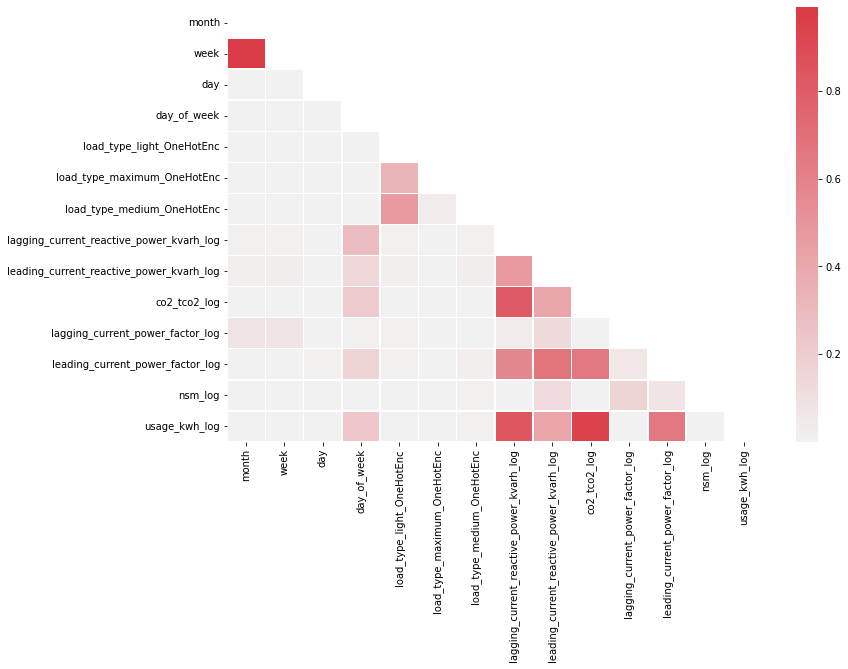

ATTENTION: The correlation plots show the linear correlations R², which go from 0 (none correlation) to 1 (perfect correlation). Obviously, the main diagonal always shows R² = 1, since the data is perfectly correlated to itself.

The returned correlation matrix, on the other hand, presents the linear coefficients of correlation R, not R². R values go from -1 (perfect negative correlation) to 1 (perfect positive correlation).

None of these coefficients take non-linear relations and the presence of a multiple linear correlation in account. For these cases, it is necessary to calculate R² adjusted, which takes in account the presence of multiple preditors and non-linearities.

Correlation matrix - numeric results:



,usage_kwh_log
usage_kwh_log,1.000000
co2_tco2_log,0.975556
lagging_current_reactive_power_kvarh_log,0.915602
leading_current_power_factor_log,0.803170
load_type_medium_OneHotEnc,0.095938
lagging_current_power_factor_log,0.076468
day,0.027625
nsm_log,0.026755
week,0.022068
month,0.014051


In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

SHOW_MASKED_PLOT = True
#SHOW_MASKED_PLOT = True - keep as True if you want to see a cleaned version of the plot
# where a mask is applied. Alternatively, SHOW_MASKED_PLOT = True, or 
# SHOW_MASKED_PLOT = False

RESPONSES_TO_RETURN_CORR = 'usage_kwh_log'
#RESPONSES_TO_RETURN_CORR - keep as None to return the full correlation tensor.
# If you want to display the correlations for a particular group of features, input them
# as a list, even if this list contains a single element. Examples:
# responses_to_return_corr = ['response1'] for a single response
# responses_to_return_corr = ['response1', 'response2', 'response3'] for multiple
# responses. Notice that 'response1',... should be substituted by the name ('string')
# of a column of the dataset that represents a response variable.
# WARNING: The returned coefficients will be ordered according to the order of the list
# of responses. i.e., they will be firstly ordered based on 'response1'
# Alternatively: a list containing strings (inside quotes) with the names of the response
# columns that you want to see the correlations. Declare as a list even if it contains a
# single element.

SET_RETURNED_LIMIT = None
# SET_RETURNED_LIMIT = None - This variable will only present effects in case you have
# provided a response feature to be returned. In this case, keep set_returned_limit = None
# to return all of the correlation coefficients; or, alternatively, 
# provide an integer number to limit the total of coefficients returned. 
# e.g. if set_returned_limit = 10, only the ten highest coefficients will be returned. 

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'correlation_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


#New dataframe saved as correlation_matrix. Simply modify this object on the left of equality:
correlation_matrix = ewf.correlation_plot (df = DATASET, show_masked_plot = SHOW_MASKED_PLOT, responses_to_return_corr = RESPONSES_TO_RETURN_CORR, set_returned_limit = SET_RETURNED_LIMIT, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [ ]:
boolean_filter = ((abs(correlation_matrix['usage_kwh_log']) >= 0.4) & (correlation_matrix['usage_kwh_log'] < 1))
correlation_matrix = correlation_matrix[boolean_filter]
correlation_matrix

,usage_kwh_log
co2_tco2_log,0.975556
lagging_current_reactive_power_kvarh_log,0.915602
leading_current_power_factor_log,0.803170
day_of_week,-0.476381
leading_current_reactive_power_kvarh_log,-0.648953


# Since all have same order with magnitude, we can try plot them in the same scatter plot.

### **Obtaining scatter plots and simple linear regressions**

5 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



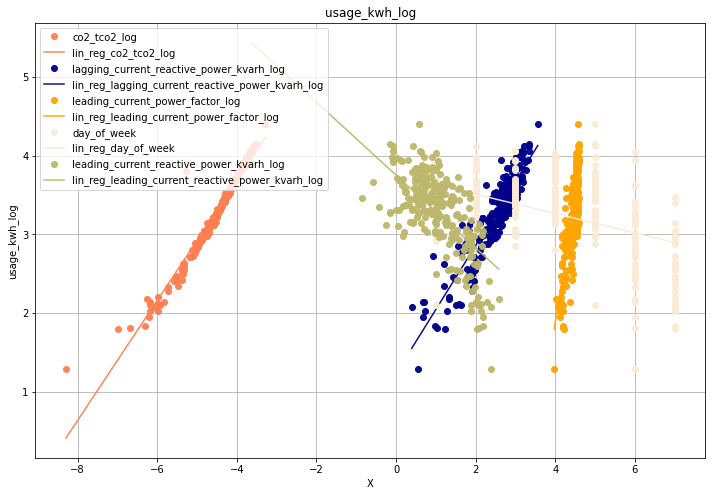


Linear regression summaries (equations and R²):

Linear regression summary for co2_tco2_log:



'y = 0.76*x + 6.73'

'R²_lin_reg = 0.9517'



Linear regression summary for lagging_current_reactive_power_kvarh_log:



'y = 0.81*x + 1.23'

'R²_lin_reg = 0.8383'



Linear regression summary for leading_current_power_factor_log:



'y = 3.09*x + -10.48'

'R²_lin_reg = 0.6451'



Linear regression summary for day_of_week:



'y = -0.12*x + 3.75'

'R²_lin_reg = 0.2269'



Linear regression summary for leading_current_reactive_power_kvarh_log:



'y = -0.46*x + 3.75'

'R²_lin_reg = 0.4211'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['co2_tco2_log'], 'y': dataset['usage_kwh_log'], 'lab': 'co2_tco2_log'}, 
    {'x': dataset['lagging_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    {'x': dataset['leading_current_power_factor_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_power_factor_log'}, 
    {'x': dataset['day_of_week'], 'y': dataset['usage_kwh_log'], 'lab': 'day_of_week'}, 
    {'x':dataset['leading_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_reactive_power_kvarh_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "usage_kwh_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "usage_kwh_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



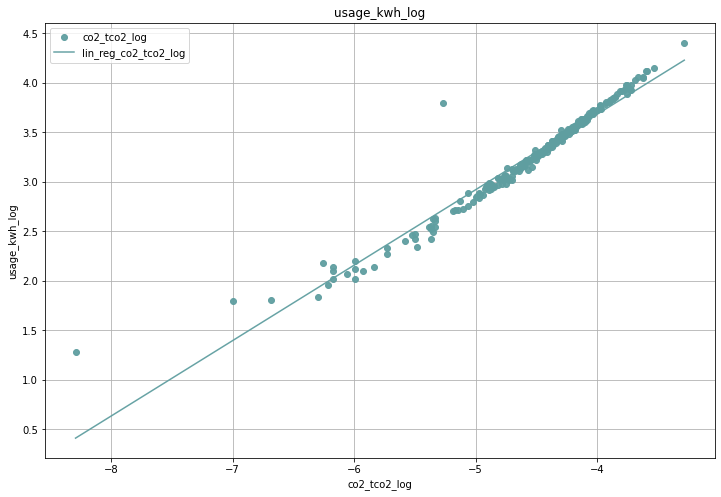


Linear regression summaries (equations and R²):

Linear regression summary for co2_tco2_log:



'y = 0.76*x + 6.73'

'R²_lin_reg = 0.9517'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['co2_tco2_log'], 'y': dataset['usage_kwh_log'], 'lab': 'co2_tco2_log'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    #{'x': dataset['leading_current_power_factor_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_power_factor_log'}, 
    #{'x': dataset['day_of_week'], 'y': dataset['usage_kwh_log'], 'lab': 'day_of_week'}, 
    #{'x':dataset['leading_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_reactive_power_kvarh_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "co2_tco2_log" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "usage_kwh_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "usage_kwh_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



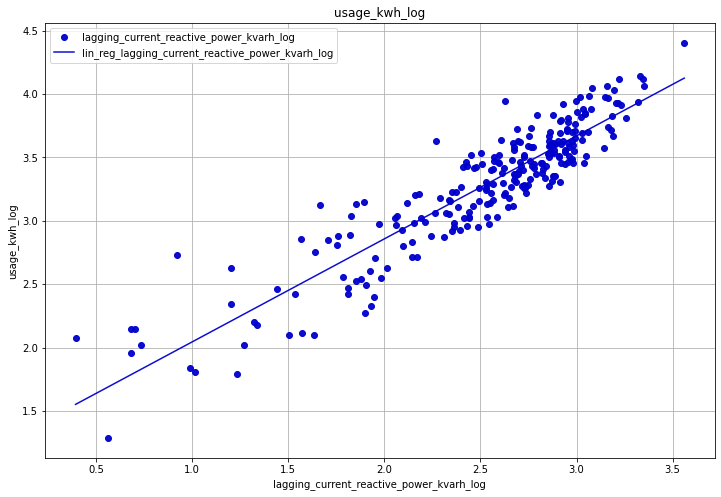


Linear regression summaries (equations and R²):

Linear regression summary for lagging_current_reactive_power_kvarh_log:



'y = 0.81*x + 1.23'

'R²_lin_reg = 0.8383'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_log'], 'y': dataset['usage_kwh_log'], 'lab': 'co2_tco2_log'}, 
    {'x': dataset['lagging_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    #{'x': dataset['leading_current_power_factor_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_power_factor_log'}, 
    #{'x': dataset['day_of_week'], 'y': dataset['usage_kwh_log'], 'lab': 'day_of_week'}, 
    #{'x':dataset['leading_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_reactive_power_kvarh_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "lagging_current_reactive_power_kvarh_log" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "usage_kwh_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "usage_kwh_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



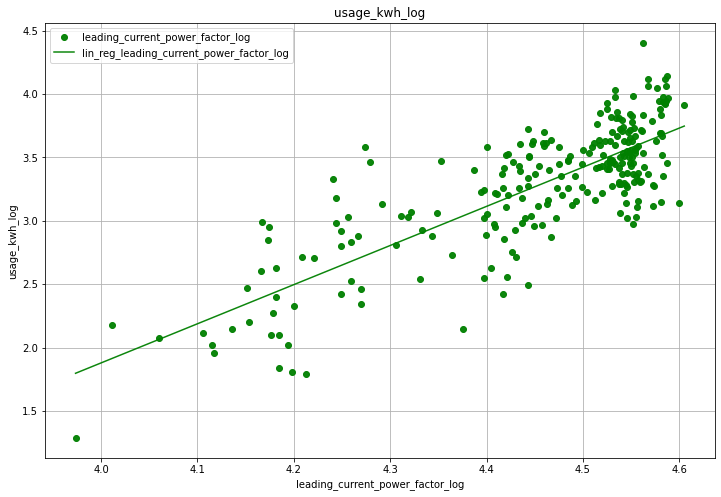


Linear regression summaries (equations and R²):

Linear regression summary for leading_current_power_factor_log:



'y = 3.09*x + -10.48'

'R²_lin_reg = 0.6451'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_log'], 'y': dataset['usage_kwh_log'], 'lab': 'co2_tco2_log'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    {'x': dataset['leading_current_power_factor_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_power_factor_log'}, 
    #{'x': dataset['day_of_week'], 'y': dataset['usage_kwh_log'], 'lab': 'day_of_week'}, 
    #{'x':dataset['leading_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_reactive_power_kvarh_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "leading_current_power_factor_log" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "usage_kwh_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "usage_kwh_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



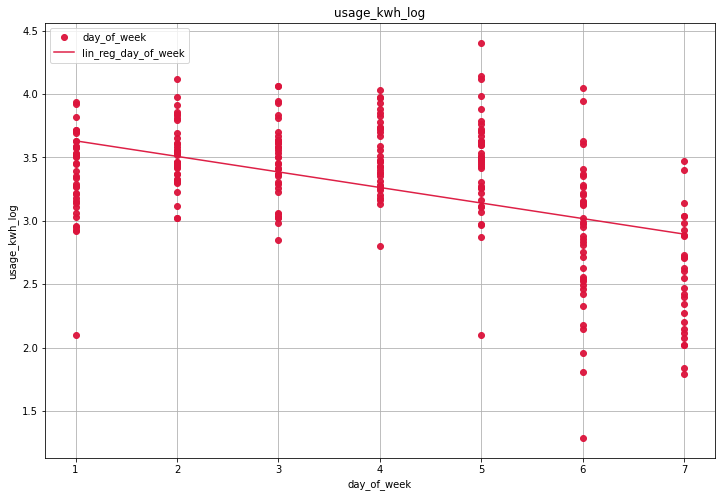


Linear regression summaries (equations and R²):

Linear regression summary for day_of_week:



'y = -0.12*x + 3.75'

'R²_lin_reg = 0.2269'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_log'], 'y': dataset['usage_kwh_log'], 'lab': 'co2_tco2_log'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    #{'x': dataset['leading_current_power_factor_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_power_factor_log'}, 
    {'x': dataset['day_of_week'], 'y': dataset['usage_kwh_log'], 'lab': 'day_of_week'}, 
    #{'x':dataset['leading_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_reactive_power_kvarh_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "day_of_week" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "usage_kwh_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "usage_kwh_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



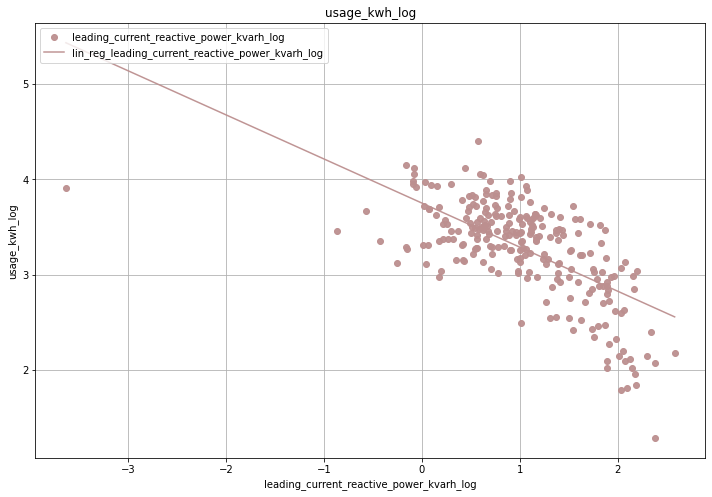


Linear regression summaries (equations and R²):

Linear regression summary for leading_current_reactive_power_kvarh_log:



'y = -0.46*x + 3.75'

'R²_lin_reg = 0.4211'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_log'], 'y': dataset['usage_kwh_log'], 'lab': 'co2_tco2_log'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    #{'x': dataset['leading_current_power_factor_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_power_factor_log'}, 
    #{'x': dataset['day_of_week'], 'y': dataset['usage_kwh_log'], 'lab': 'day_of_week'}, 
    {'x':dataset['leading_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_reactive_power_kvarh_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "leading_current_reactive_power_kvarh_log" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "usage_kwh_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "usage_kwh_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

# Now, let's check other correlations.
- For modelling we should not keep two or more features highly correlated to each other:
  - In this case, one can be directly obtained from the other using the linear relation.
  - These features will carry the same amount of information. Then, we would be redundant and increase the importance of that information.

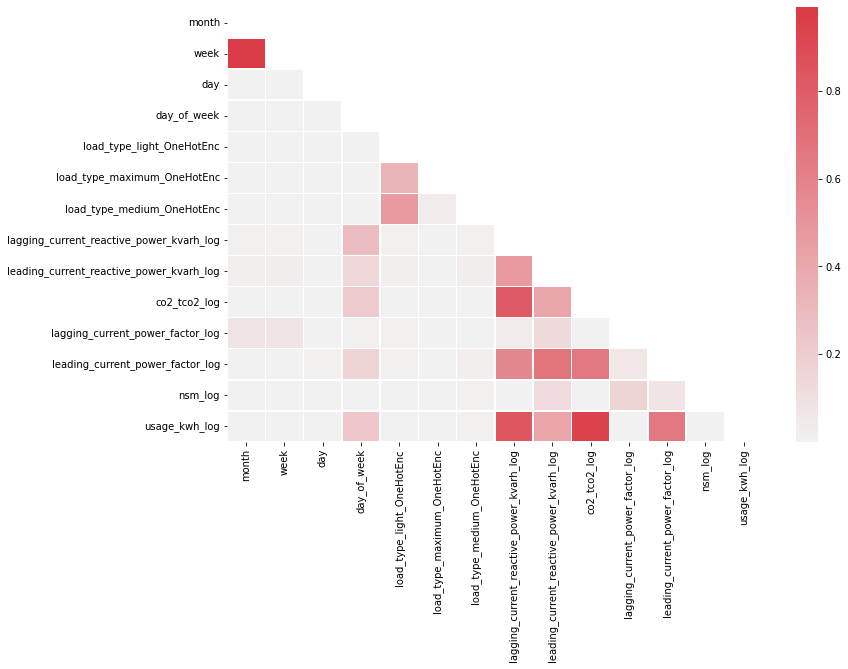

ATTENTION: The correlation plots show the linear correlations R², which go from 0 (none correlation) to 1 (perfect correlation). Obviously, the main diagonal always shows R² = 1, since the data is perfectly correlated to itself.

The returned correlation matrix, on the other hand, presents the linear coefficients of correlation R, not R². R values go from -1 (perfect negative correlation) to 1 (perfect positive correlation).

None of these coefficients take non-linear relations and the presence of a multiple linear correlation in account. For these cases, it is necessary to calculate R² adjusted, which takes in account the presence of multiple preditors and non-linearities.

Correlation matrix - numeric results:



,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log
month,1.000000,0.995561,-0.032812,0.012813,-0.018774,0.016229,0.008191,0.111904,-0.151139,0.043123,-0.282586,0.073196,0.020600,0.014051
week,0.995561,1.000000,0.058775,0.000757,-0.018706,0.011643,0.012147,0.120603,-0.164227,0.051282,-0.279681,0.086632,0.022323,0.022068
day,-0.032812,0.058775,1.000000,-0.054209,-0.002557,-0.030006,0.029484,0.037052,-0.082666,0.035855,0.017972,0.088208,0.020200,0.027625
day_of_week,0.012813,0.000757,-0.054209,1.000000,0.079224,-0.020806,-0.076547,-0.529559,0.381054,-0.457635,0.113211,-0.412028,0.040238,-0.476381
load_type_light_OneHotEnc,-0.018774,-0.018706,-0.002557,0.079224,1.000000,-0.573444,-0.692515,-0.111470,0.128879,-0.077629,0.122777,-0.113533,0.055902,-0.077763
load_type_maximum_OneHotEnc,0.016229,0.011643,-0.030006,-0.020806,-0.573444,1.000000,-0.193887,0.035439,0.006413,0.009840,-0.068204,-0.005807,0.041105,-0.003202
load_type_medium_OneHotEnc,0.008191,0.012147,0.029484,-0.076547,-0.692515,-0.193887,1.000000,0.102276,-0.159976,0.084294,-0.086964,0.141066,-0.103137,0.095938
lagging_current_reactive_power_kvarh_log,0.111904,0.120603,0.037052,-0.529559,-0.111470,0.035439,0.102276,1.000000,-0.692535,0.898399,-0.177103,0.761065,-0.050769,0.915602
leading_current_reactive_power_kvarh_log,-0.151139,-0.164227,-0.082666,0.381054,0.128879,0.006413,-0.159976,-0.692535,1.000000,-0.637665,0.357607,-0.825124,0.348101,-0.648953
co2_tco2_log,0.043123,0.051282,0.035855,-0.457635,-0.077629,0.009840,0.084294,0.898399,-0.637665,1.000000,0.022824,0.803344,0.015191,0.975556


In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

SHOW_MASKED_PLOT = True
#SHOW_MASKED_PLOT = True - keep as True if you want to see a cleaned version of the plot
# where a mask is applied. Alternatively, SHOW_MASKED_PLOT = True, or 
# SHOW_MASKED_PLOT = False

RESPONSES_TO_RETURN_CORR = None
#RESPONSES_TO_RETURN_CORR - keep as None to return the full correlation tensor.
# If you want to display the correlations for a particular group of features, input them
# as a list, even if this list contains a single element. Examples:
# responses_to_return_corr = ['response1'] for a single response
# responses_to_return_corr = ['response1', 'response2', 'response3'] for multiple
# responses. Notice that 'response1',... should be substituted by the name ('string')
# of a column of the dataset that represents a response variable.
# WARNING: The returned coefficients will be ordered according to the order of the list
# of responses. i.e., they will be firstly ordered based on 'response1'
# Alternatively: a list containing strings (inside quotes) with the names of the response
# columns that you want to see the correlations. Declare as a list even if it contains a
# single element.

SET_RETURNED_LIMIT = None
# SET_RETURNED_LIMIT = None - This variable will only present effects in case you have
# provided a response feature to be returned. In this case, keep set_returned_limit = None
# to return all of the correlation coefficients; or, alternatively, 
# provide an integer number to limit the total of coefficients returned. 
# e.g. if set_returned_limit = 10, only the ten highest coefficients will be returned. 

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'correlation_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


#New dataframe saved as correlation_matrix. Simply modify this object on the left of equality:
correlation_matrix = ewf.correlation_plot (df = DATASET, show_masked_plot = SHOW_MASKED_PLOT, responses_to_return_corr = RESPONSES_TO_RETURN_CORR, set_returned_limit = SET_RETURNED_LIMIT, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [ ]:
# Remove correlations with itself:
boolean_filter1 = (abs(correlation_matrix) < 1)
filtered_matrix = correlation_matrix[boolean_filter1]

# Convert the matrix from R to R²:
filtered_matrix = (filtered_matrix)**2

# Set a threshold: R² >= 0.7
boolean_filter = (filtered_matrix >= 0.6)
filtered_matrix = filtered_matrix[boolean_filter]

# Remove completely blank columns
filtered_matrix.dropna(how = 'all', axis = 1, inplace = True)

# Remove completely blank rows
filtered_matrix.dropna(how = 'all', axis = 0, inplace = True)

# Drop the response variable column:
filtered_matrix.drop("usage_kwh_log", axis = 1, inplace = True)

# Drop the response variable row:
filtered_matrix.drop("usage_kwh_log", axis = 0, inplace = True)

filtered_matrix

,month,week,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,leading_current_power_factor_log
month,NaN,0.991142,NaN,NaN,NaN,NaN
week,0.991142,NaN,NaN,NaN,NaN,NaN
lagging_current_reactive_power_kvarh_log,NaN,NaN,NaN,NaN,0.807121,NaN
leading_current_reactive_power_kvarh_log,NaN,NaN,NaN,NaN,NaN,0.680829
co2_tco2_log,NaN,NaN,0.807121,NaN,NaN,0.645362
leading_current_power_factor_log,NaN,NaN,NaN,0.680829,0.645362,NaN


# We can see that the variables month and week number are (naturally) perfectly correlated with each other.

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



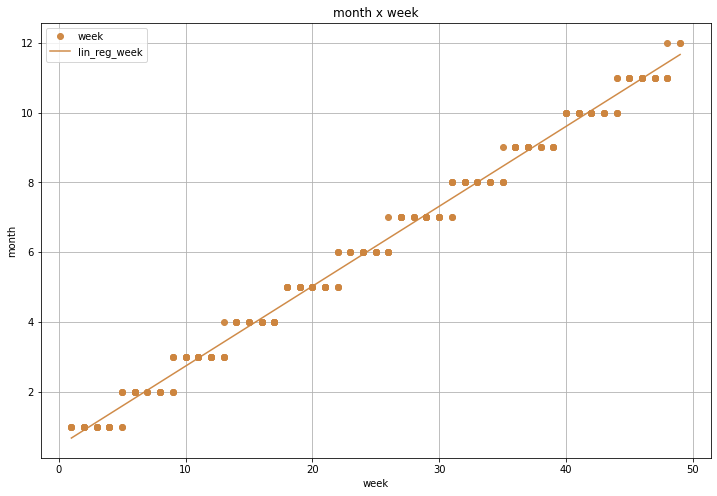


Linear regression summaries (equations and R²):

Linear regression summary for week:



'y = 0.23*x + 0.45'

'R²_lin_reg = 0.9911'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_log'], 'y': dataset['usage_kwh_log'], 'lab': 'co2_tco2_log'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    #{'x': dataset['leading_current_power_factor_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_power_factor_log'}, 
    #{'x': dataset['day_of_week'], 'y': dataset['usage_kwh_log'], 'lab': 'day_of_week'}, 
    {'x':dataset['week'], 'y': dataset['month'], 'lab': 'week'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "week" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "month" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "month x week" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [ ]:
# Drop month and week columns:
filtered_matrix.drop(["month", "week"], axis = 1, inplace = True)

# Drop month and week rows:
filtered_matrix.drop(["month", "week"], axis = 0, inplace = True)

# Remove completely blank rows
filtered_matrix.dropna(how = 'all', axis = 0, inplace = True)

filtered_matrix

,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,leading_current_power_factor_log
lagging_current_reactive_power_kvarh_log,NaN,NaN,0.807121,NaN
leading_current_reactive_power_kvarh_log,NaN,NaN,NaN,0.680829
co2_tco2_log,0.807121,NaN,NaN,0.645362
leading_current_power_factor_log,NaN,0.680829,0.645362,NaN


1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



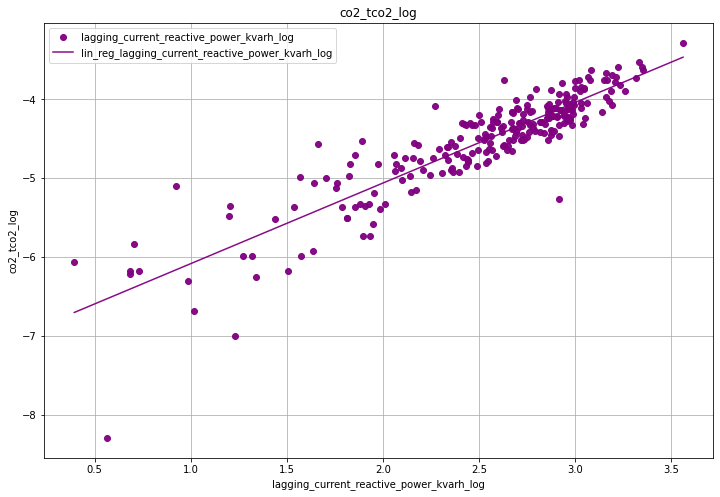


Linear regression summaries (equations and R²):

Linear regression summary for lagging_current_reactive_power_kvarh_log:



'y = 1.02*x + -7.10'

'R²_lin_reg = 0.8071'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_log'], 'y': dataset['usage_kwh_log'], 'lab': 'co2_tco2_log'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    #{'x': dataset['leading_current_power_factor_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_power_factor_log'}, 
    #{'x': dataset['day_of_week'], 'y': dataset['usage_kwh_log'], 'lab': 'day_of_week'}, 
    {'x':dataset['lagging_current_reactive_power_kvarh_log'], 'y': dataset['co2_tco2_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "lagging_current_reactive_power_kvarh_log" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "co2_tco2_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "co2_tco2_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



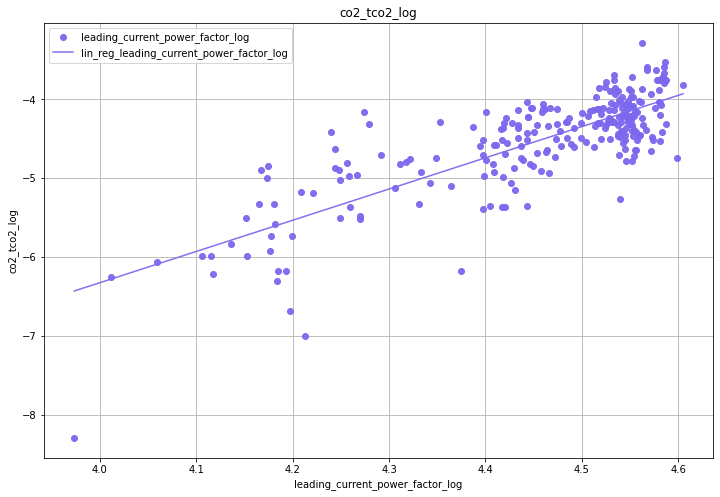


Linear regression summaries (equations and R²):

Linear regression summary for leading_current_power_factor_log:



'y = 3.96*x + -22.15'

'R²_lin_reg = 0.6454'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_log'], 'y': dataset['usage_kwh_log'], 'lab': 'co2_tco2_log'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    #{'x': dataset['leading_current_power_factor_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_power_factor_log'}, 
    #{'x': dataset['day_of_week'], 'y': dataset['usage_kwh_log'], 'lab': 'day_of_week'}, 
    {'x':dataset['leading_current_power_factor_log'], 'y': dataset['co2_tco2_log'], 'lab': 'leading_current_power_factor_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "leading_current_power_factor_log" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "co2_tco2_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "co2_tco2_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



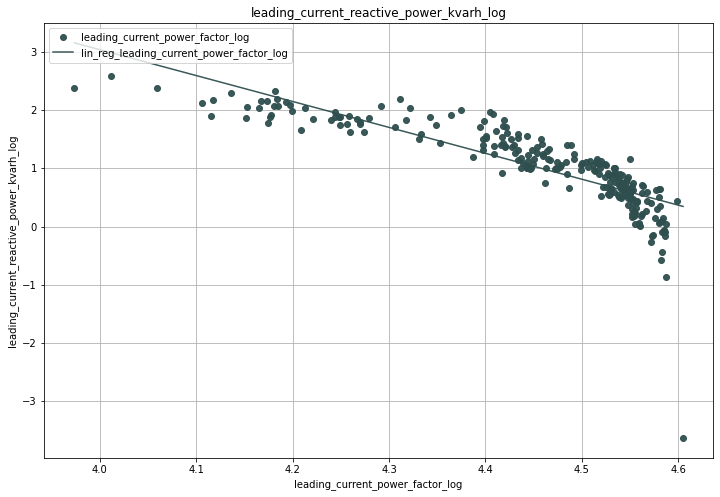


Linear regression summaries (equations and R²):

Linear regression summary for leading_current_power_factor_log:



'y = -4.45*x + 20.83'

'R²_lin_reg = 0.6808'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_log'], 'y': dataset['usage_kwh_log'], 'lab': 'co2_tco2_log'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_log'], 'y': dataset['usage_kwh_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    #{'x': dataset['leading_current_power_factor_log'], 'y': dataset['usage_kwh_log'], 'lab': 'leading_current_power_factor_log'}, 
    #{'x': dataset['day_of_week'], 'y': dataset['usage_kwh_log'], 'lab': 'day_of_week'}, 
    {'x':dataset['leading_current_power_factor_log'], 'y': dataset['leading_current_reactive_power_kvarh_log'], 'lab': 'leading_current_power_factor_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = "leading_current_power_factor_log" #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = "leading_current_reactive_power_kvarh_log" #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  "leading_current_reactive_power_kvarh_log" #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

## The variables `week` and `month` are perfectly correlated, so we can keep only one of them when modelling.

## The variables `lagging_current_reactive_power_kvarh_log` and `co2_tco2_log` are also perfectly correlated.
- Since the more fundamental physical variable is `lagging_current_reactive_power_kvarh_log`, we can keep only this one when modelling.
- Also, both are very good predictors for the energy consume, so we will not lose this prediction power. Since there are two strong linear correlations, the amount of CO2 can be easily obtained from the others.


### **Visualizing time series**

In [ ]:
dataset.columns

Index(['timestamp', 'month', 'week', 'day', 'day_of_week',
       'load_type_light_OneHotEnc', 'load_type_maximum_OneHotEnc',
       'load_type_medium_OneHotEnc',
       'lagging_current_reactive_power_kvarh_log',
       'leading_current_reactive_power_kvarh_log', 'co2_tco2_log',
       'lagging_current_power_factor_log', 'leading_current_power_factor_log',
       'nsm_log', 'usage_kwh_log'],
      dtype='object')

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



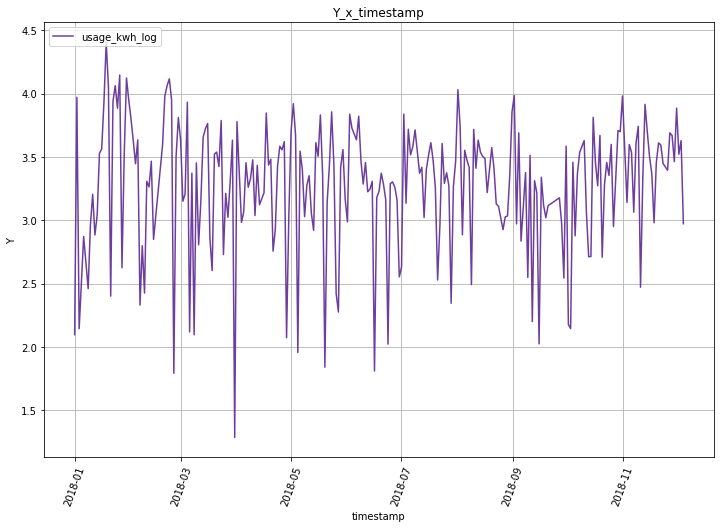

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['usage_kwh_log'], 'lab': 'usage_kwh_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



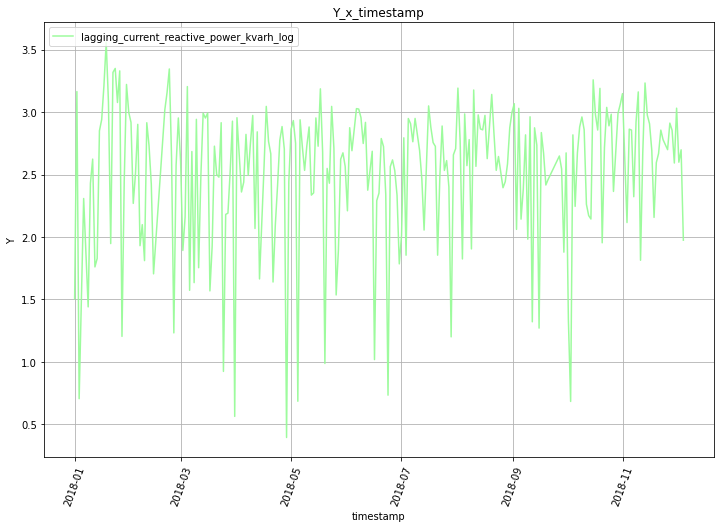

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['lagging_current_reactive_power_kvarh_log'], 'lab': 'lagging_current_reactive_power_kvarh_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



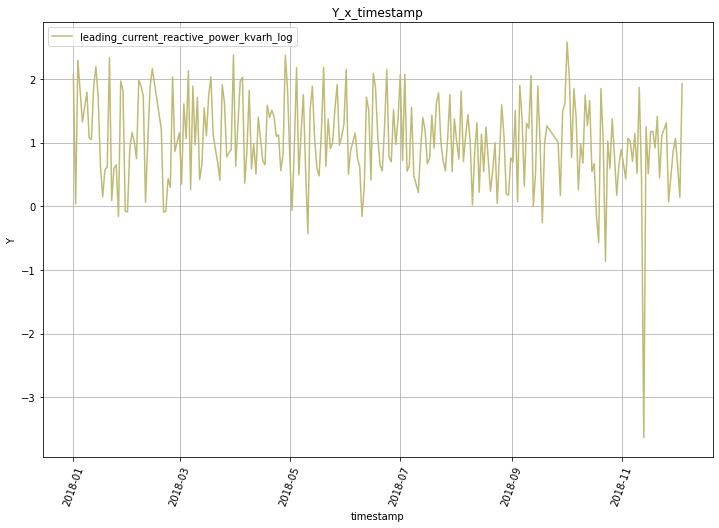

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['leading_current_reactive_power_kvarh_log'], 'lab': 'leading_current_reactive_power_kvarh_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



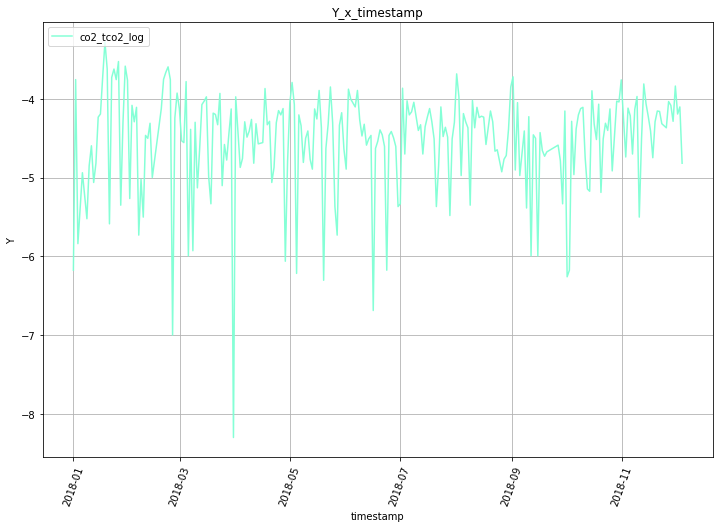

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['co2_tco2_log'], 'lab': 'co2_tco2_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



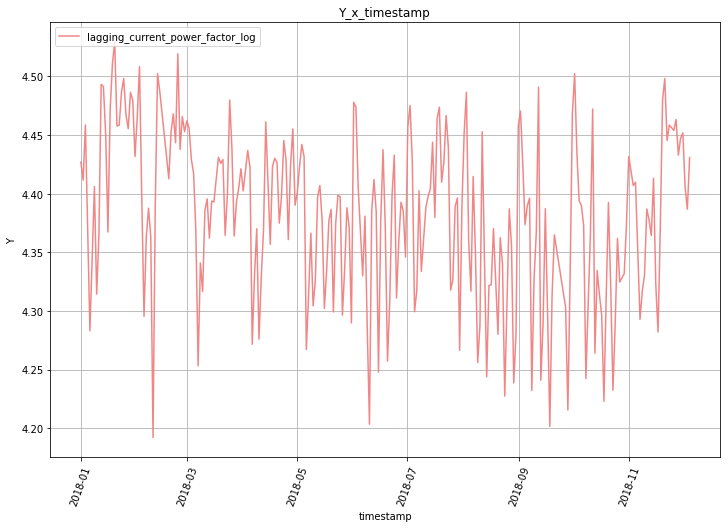

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['lagging_current_power_factor_log'], 'lab': 'lagging_current_power_factor_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



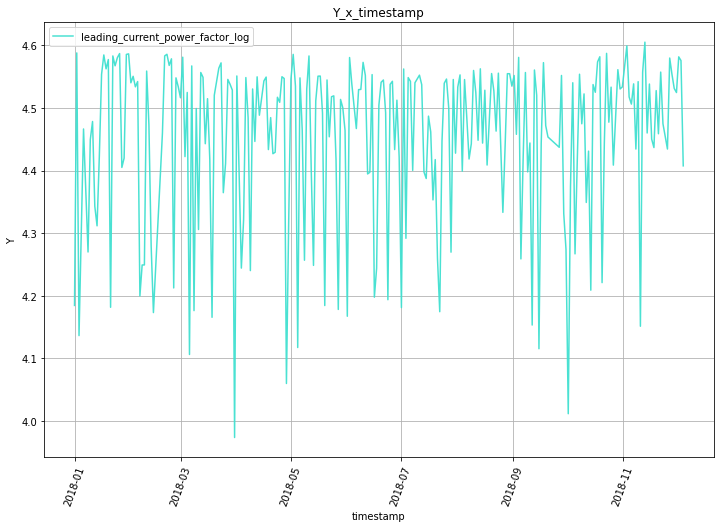

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['leading_current_power_factor_log'], 'lab': 'leading_current_power_factor_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



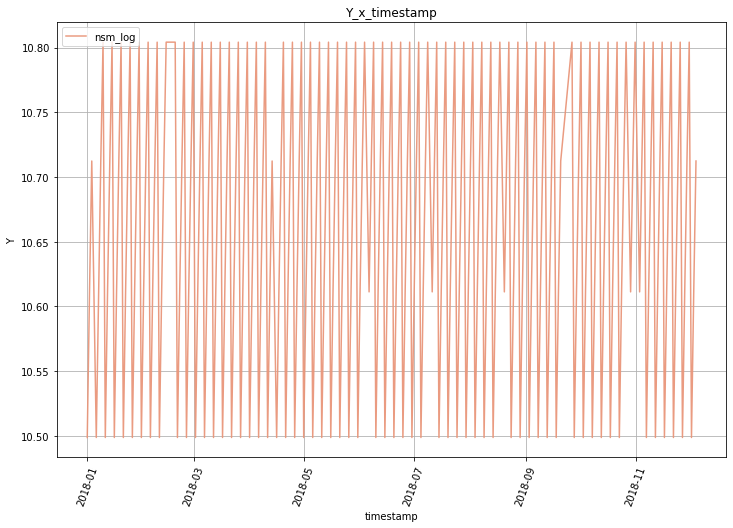

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['nsm_log'], 'lab': 'nsm_log'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Visualizing histograms**


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

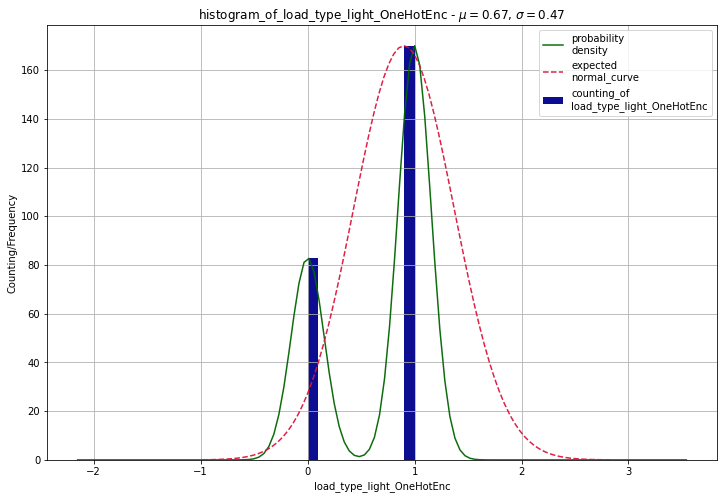

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.671937
median,1.000000
standard_deviation,0.470439
lowest_load_type_light_OneHotEnc,0.000000
highest_load_type_light_OneHotEnc,1.000000
count_of_values,253.000000
number_of_bins,11.000000
bin_size,0.100000
bin_of_max_proba,0.900000




Check the frequency table:



,bin_center,count
0,0.0,83.0
1,0.1,0.0
2,0.2,0.0
3,0.3,0.0
4,0.4,0.0
5,0.5,0.0
6,0.6,0.0
7,0.7,0.0
8,0.8,0.0
9,0.9,170.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type_light_OneHotEnc'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 10
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

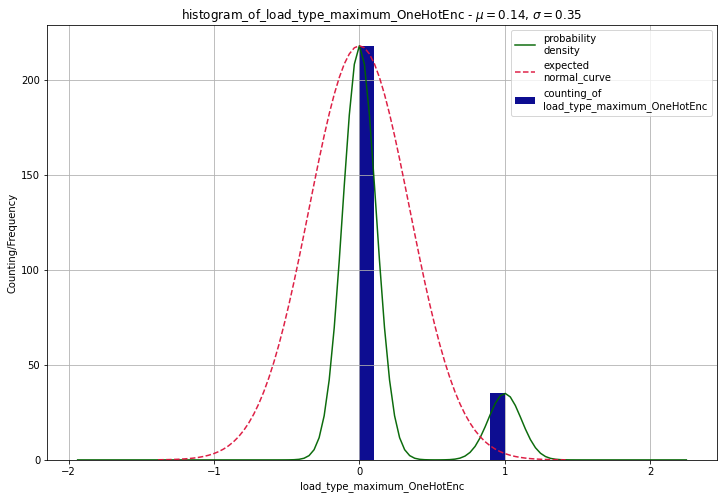

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.138340
median,0.000000
standard_deviation,0.345941
lowest_load_type_maximum_OneHotEnc,0.000000
highest_load_type_maximum_OneHotEnc,1.000000
count_of_values,253.000000
number_of_bins,11.000000
bin_size,0.100000
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.0,218.0
1,0.1,0.0
2,0.2,0.0
3,0.3,0.0
4,0.4,0.0
5,0.5,0.0
6,0.6,0.0
7,0.7,0.0
8,0.8,0.0
9,0.9,35.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type_maximum_OneHotEnc'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 10
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

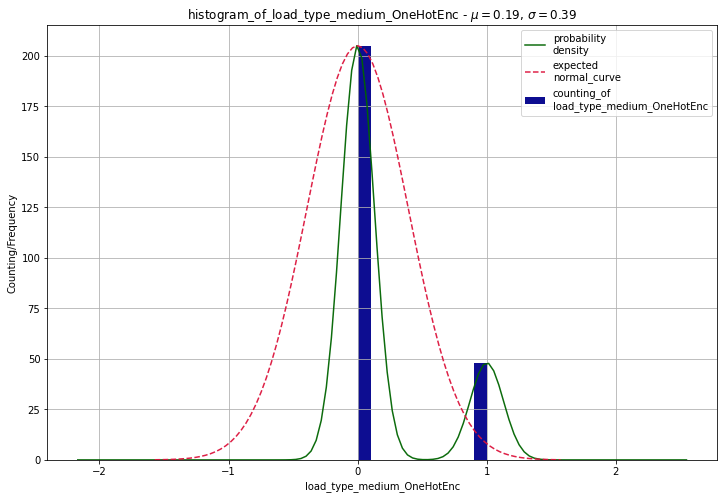

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.189723
median,0.000000
standard_deviation,0.392859
lowest_load_type_medium_OneHotEnc,0.000000
highest_load_type_medium_OneHotEnc,1.000000
count_of_values,253.000000
number_of_bins,11.000000
bin_size,0.100000
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.0,205.0
1,0.1,0.0
2,0.2,0.0
3,0.3,0.0
4,0.4,0.0
5,0.5,0.0
6,0.6,0.0
7,0.7,0.0
8,0.8,0.0
9,0.9,48.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type_medium_OneHotEnc'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 10
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

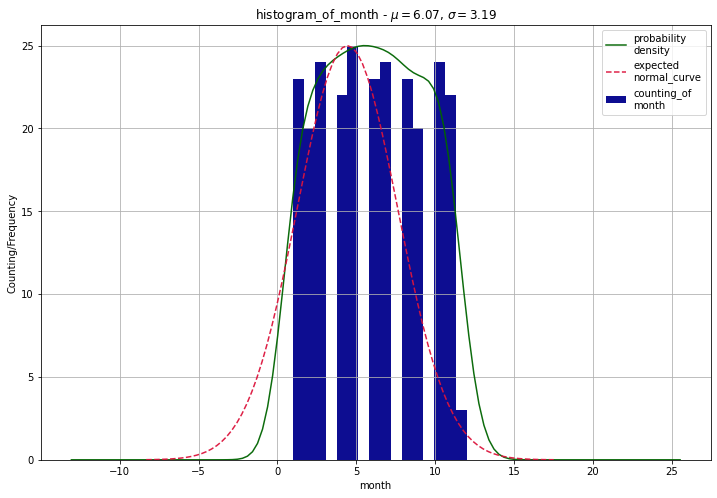

Check the general statistics from the analyzed variable:



,value
statistics,
mean,6.071146
median,6.000000
standard_deviation,3.187724
lowest_month,1.000000
highest_month,12.000000
count_of_values,253.000000
number_of_bins,17.000000
bin_size,0.687500
bin_of_max_proba,4.437500




Check the frequency table:



,bin_center,count
0,1.0000,23.0
1,1.6875,20.0
2,2.3750,24.0
3,3.0625,0.0
4,3.7500,22.0
5,4.4375,25.0
6,5.1250,0.0
7,5.8125,23.0
8,6.5000,24.0
9,7.1875,0.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'month'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 16
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

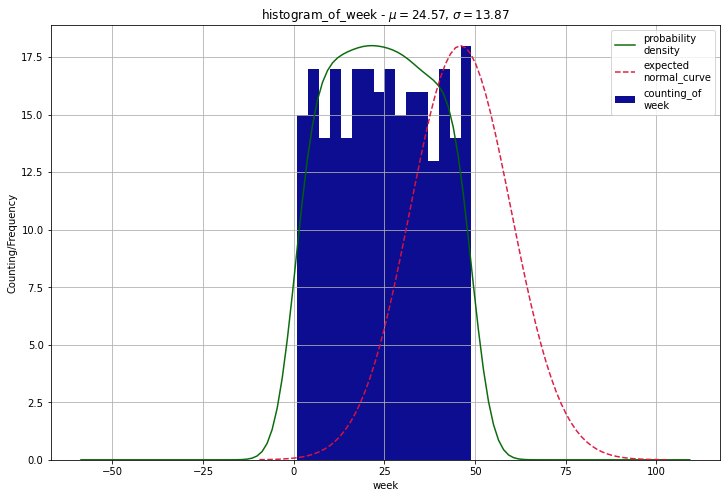

Check the general statistics from the analyzed variable:



,value
statistics,
mean,24.569170
median,24.000000
standard_deviation,13.870438
lowest_week,1.000000
highest_week,49.000000
count_of_values,253.000000
number_of_bins,17.000000
bin_size,3.000000
bin_of_max_proba,46.000000




Check the frequency table:



,bin_center,count
0,1.0,15.0
1,4.0,17.0
2,7.0,14.0
3,10.0,17.0
4,13.0,14.0
5,16.0,17.0
6,19.0,17.0
7,22.0,16.0
8,25.0,17.0
9,28.0,15.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'week'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 16
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

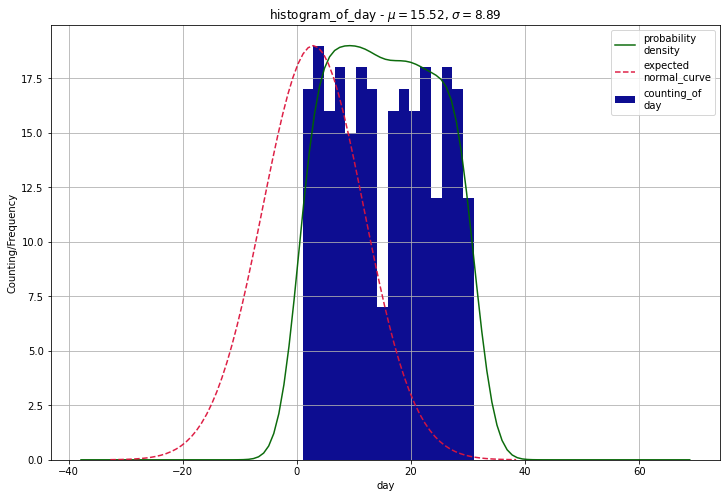

Check the general statistics from the analyzed variable:



,value
statistics,
mean,15.521739
median,15.000000
standard_deviation,8.892464
lowest_day,1.000000
highest_day,31.000000
count_of_values,253.000000
number_of_bins,17.000000
bin_size,1.875000
bin_of_max_proba,2.875000




Check the frequency table:



,bin_center,count
0,1.000,17.0
1,2.875,19.0
2,4.750,16.0
3,6.625,18.0
4,8.500,15.0
5,10.375,18.0
6,12.250,17.0
7,14.125,7.0
8,16.000,16.0
9,17.875,17.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'day'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 16
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

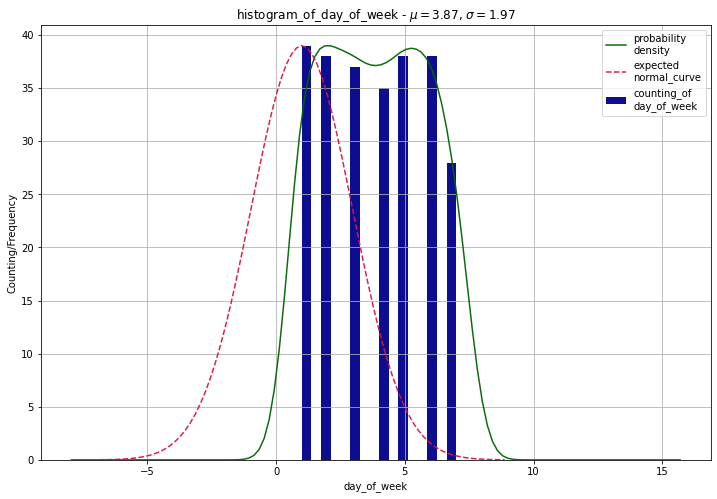

Check the general statistics from the analyzed variable:



,value
statistics,
mean,3.873518
median,4.000000
standard_deviation,1.969966
lowest_day_of_week,1.000000
highest_day_of_week,7.000000
count_of_values,253.000000
number_of_bins,17.000000
bin_size,0.375000
bin_of_max_proba,1.000000




Check the frequency table:



,bin_center,count
0,1.000,39.0
1,1.375,0.0
2,1.750,38.0
3,2.125,0.0
4,2.500,0.0
5,2.875,37.0
6,3.250,0.0
7,3.625,0.0
8,4.000,35.0
9,4.375,0.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'day_of_week'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 16
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

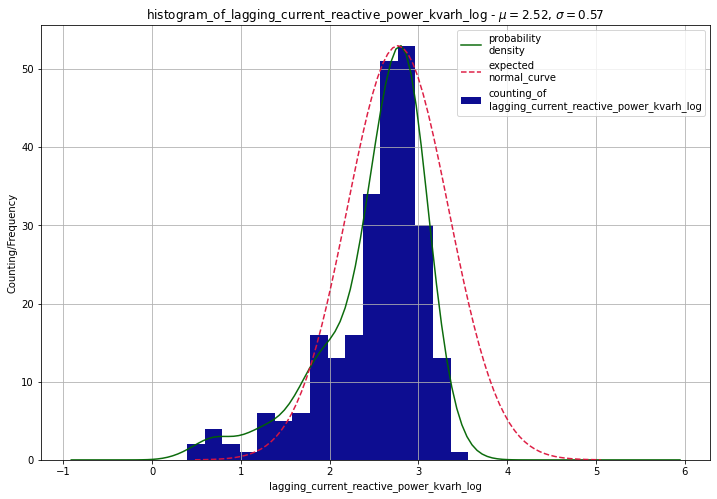

Check the general statistics from the analyzed variable:



,value
statistics,
mean,2.518178
median,2.673890
standard_deviation,0.571319
lowest_lagging_current_reactive_power_kvarh_log,0.394179
highest_lagging_current_reactive_power_kvarh_log,3.560286
count_of_values,253.000000
number_of_bins,17.000000
bin_size,0.197882
bin_of_max_proba,2.768759




Check the frequency table:



,bin_center,count
0,0.394179,2.0
1,0.592061,4.0
2,0.789943,2.0
3,0.987824,1.0
4,1.185706,6.0
5,1.383588,5.0
6,1.581469,6.0
7,1.779351,16.0
8,1.977233,13.0
9,2.175114,16.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'lagging_current_reactive_power_kvarh_log'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 16
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

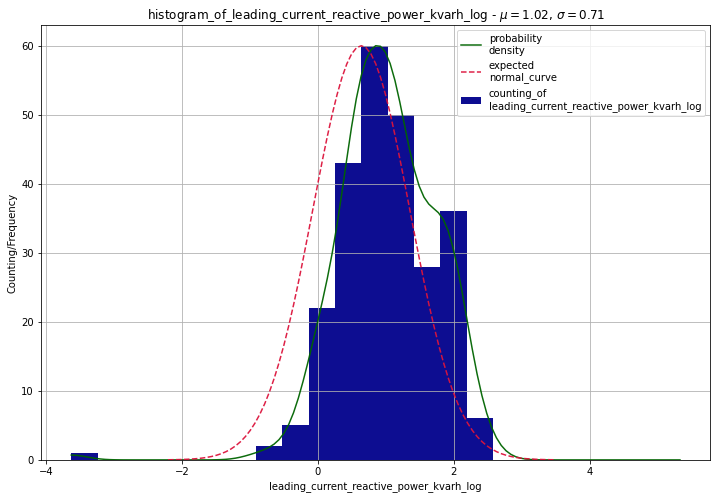

Check the general statistics from the analyzed variable:



,value
statistics,
mean,1.021076
median,1.007867
standard_deviation,0.711539
lowest_leading_current_reactive_power_kvarh_log,-3.633760
highest_leading_current_reactive_power_kvarh_log,2.579352
count_of_values,253.000000
number_of_bins,17.000000
bin_size,0.388319
bin_of_max_proba,0.637754




Check the frequency table:



,bin_center,count
0,-3.633760,1.0
1,-3.245441,0.0
2,-2.857121,0.0
3,-2.468802,0.0
4,-2.080482,0.0
5,-1.692163,0.0
6,-1.303843,0.0
7,-0.915524,2.0
8,-0.527204,5.0
9,-0.138885,22.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'leading_current_reactive_power_kvarh_log'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 16
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

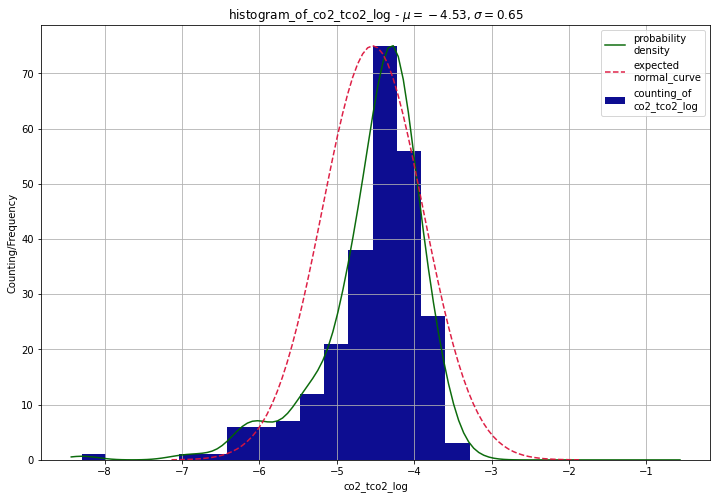

Check the general statistics from the analyzed variable:



,value
statistics,
mean,-4.531031
median,-4.368781
standard_deviation,0.649823
lowest_co2_tco2_log,-8.294050
highest_co2_tco2_log,-3.283414
count_of_values,253.000000
number_of_bins,17.000000
bin_size,0.313165
bin_of_max_proba,-4.536073




Check the frequency table:



,bin_center,count
0,-8.294050,1.0
1,-7.980885,0.0
2,-7.667720,0.0
3,-7.354556,0.0
4,-7.041391,1.0
5,-6.728226,1.0
6,-6.415061,6.0
7,-6.101897,6.0
8,-5.788732,7.0
9,-5.475567,12.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'co2_tco2_log'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 16
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

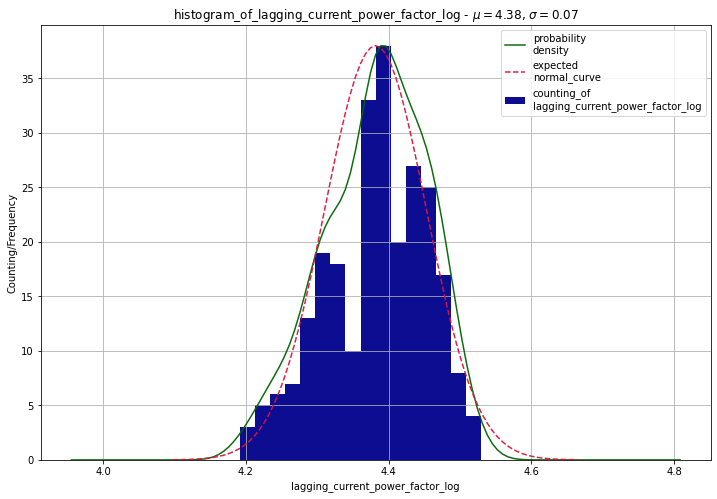

Check the general statistics from the analyzed variable:



,value
statistics,
mean,4.382036
median,4.388478
standard_deviation,0.071044
lowest_lagging_current_power_factor_log,4.192176
highest_lagging_current_power_factor_log,4.529243
count_of_values,253.000000
number_of_bins,17.000000
bin_size,0.021067
bin_of_max_proba,4.381776




Check the frequency table:



,bin_center,count
0,4.192176,3.0
1,4.213242,5.0
2,4.234309,6.0
3,4.255376,7.0
4,4.276442,13.0
5,4.297509,19.0
6,4.318576,18.0
7,4.339642,10.0
8,4.360709,33.0
9,4.381776,38.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'lagging_current_power_factor_log'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 16
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

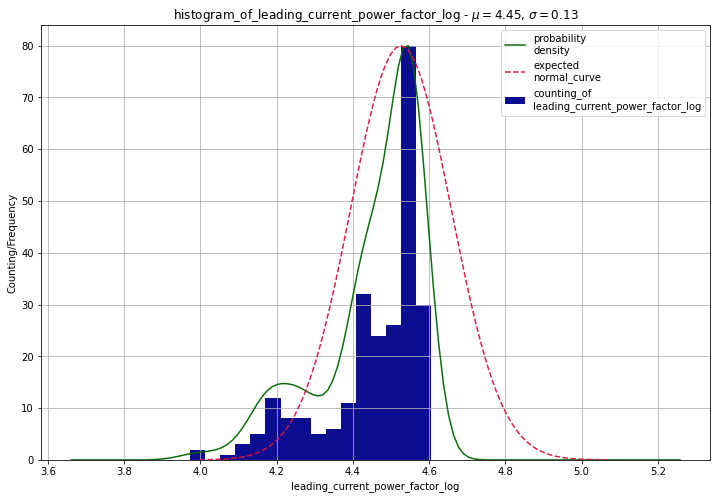

Check the general statistics from the analyzed variable:



,value
statistics,
mean,4.453286
median,4.509040
standard_deviation,0.131976
lowest_leading_current_power_factor_log,3.973461
highest_leading_current_power_factor_log,4.605164
count_of_values,253.000000
number_of_bins,17.000000
bin_size,0.039481
bin_of_max_proba,4.526201




Check the frequency table:



,bin_center,count
0,3.973461,2.0
1,4.012943,0.0
2,4.052424,1.0
3,4.091906,3.0
4,4.131387,5.0
5,4.170868,12.0
6,4.210350,8.0
7,4.249831,8.0
8,4.289312,5.0
9,4.328794,6.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'leading_current_power_factor_log'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 16
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

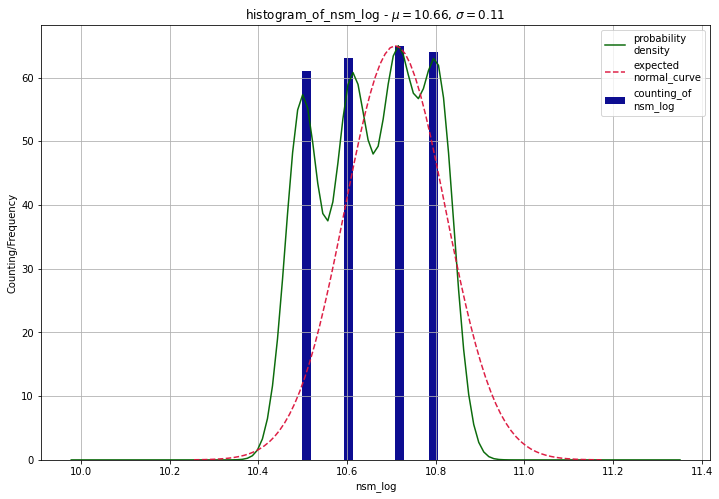

Check the general statistics from the analyzed variable:



,value
statistics,
mean,10.658947
median,10.712416
standard_deviation,0.113493
lowest_nsm_log,10.498746
highest_nsm_log,10.804258
count_of_values,253.000000
number_of_bins,17.000000
bin_size,0.019095
bin_of_max_proba,10.708786




Check the frequency table:



,bin_center,count
0,10.498746,61.0
1,10.517841,0.0
2,10.536935,0.0
3,10.556030,0.0
4,10.575124,0.0
5,10.594219,63.0
6,10.613313,0.0
7,10.632408,0.0
8,10.651502,0.0
9,10.670597,0.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'nsm_log'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 16
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 16 bins.



<Figure size 432x288 with 0 Axes>

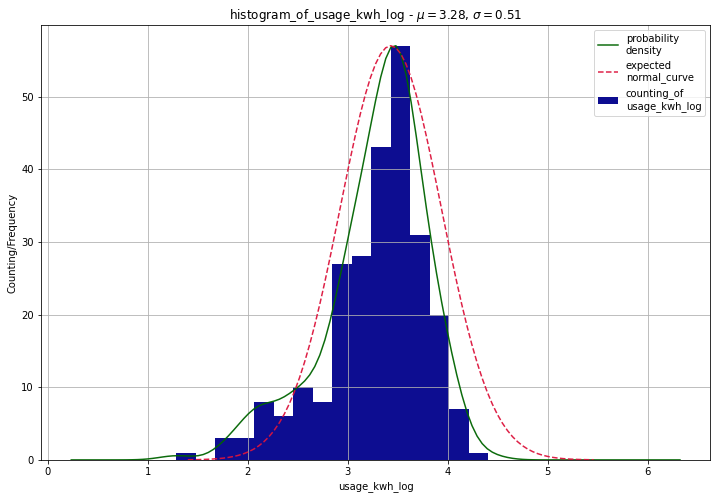

Check the general statistics from the analyzed variable:



,value
statistics,
mean,3.278863
median,3.375948
standard_deviation,0.507564
lowest_usage_kwh_log,1.284907
highest_usage_kwh_log,4.405394
count_of_values,253.000000
number_of_bins,17.000000
bin_size,0.195030
bin_of_max_proba,3.430242




Check the frequency table:



,bin_center,count
0,1.284907,1.0
1,1.479938,0.0
2,1.674968,3.0
3,1.869999,3.0
4,2.065029,8.0
5,2.260060,6.0
6,2.455090,10.0
7,2.650120,8.0
8,2.845151,27.0
9,3.040181,28.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'usage_kwh_log'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 16
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [ ]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = dataset
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset_transformed_log"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the 
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file" 
# to export the CSV file 'my_file.csv' to notebook's workspace.

idsw.export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe dataset_transformed_log exported as CSV file to notebook's workspace as 'dataset_transformed_log.csv'.


## **Downloading a file from Google Colab to the local machine; or uploading a file from the machine to Colab's instant memory**

#### Case 2: download a file from Colab's workspace

In [ ]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = "dataset_transformed_log.csv"
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

idsw.upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

The file will be downloaded to your computer.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File dataset_transformed_log.csv successfully downloaded from Colab environment.


****